In [372]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [153]:
df = pd.read_csv('sensity_events.csv')

In [154]:
df.head()

,uuid,asset_id,start_time,end_time,session_type,latitude,longitude,geometry
0,SENSITY-kc-23-40D98DC1-41F8-40EE-BBB8-E44DE41C79F2,SENSITY-kc-23,2018-08-10 23:33:26.081,2018-08-10 23:33:55.9371,car,39.109786,-94.583482,"{""type"":""Polygon"",""coordinates"":[[[-94.58345988501729,39.109801922212036],[-94.58351157969885,39.109786580473695],[-94.58350343850962,39.10976992979666],[-94.58345174382806,39.109785271535],[-94.58345988501729,39.109801922212036]]]}"
1,SENSITY-kc-22-E5EBBB3A-05E4-4D9C-97CB-2654291867B6,SENSITY-kc-22,2018-08-10 23:34:58.454,2018-08-10 23:36:08.256733,car,39.109536,-94.580771,"{""type"":""Polygon"",""coordinates"":[[[-94.58075470021177,39.10952049535309],[-94.5807674179001,39.10955602781536],[-94.58078781302042,39.10955159700619],[-94.58077509533209,39.10951606454392],[-94.58075470021177,39.10952049535309]]]}"
2,SENSITY-kc-10-C4D472BA-65CA-4D2B-A6C0-9C3981CDEBFC,SENSITY-kc-10,2018-08-10 23:33:40.424,2018-08-10 23:36:25.890125,car,39.094360,-94.583396,"{""type"":""Polygon"",""coordinates"":[[[-94.5834062421616,39.09438467559006],[-94.58340906848268,39.09433597524264],[-94.58338657004708,39.09433518236425],[-94.583383743726,39.094383882711654],[-94.5834062421616,39.09438467559006]]]}"
3,SENSITY-kc-12-4C26D1EC-4CCE-4E9A-87D1-D93149F5BEF6,SENSITY-kc-12,2018-08-10 23:34:44.149,2018-08-10 23:38:53.829785,car,39.095302,-94.583515,"{""type"":""Polygon"",""coordinates"":[[[-94.58352497138776,39.09532433668034],[-94.58352597146971,39.09528040545814],[-94.58350567597955,39.09528012490676],[-94.58350467589761,39.095324056128966],[-94.58352497138776,39.09532433668034]]]}"
4,SENSITY-kc-9-CDDB22AD-31F6-4A11-BC94-CCC6602575A1,SENSITY-kc-9,2018-08-10 23:37:38.946,2018-08-10 23:39:01.415632,car,39.092984,-94.583621,"{""type"":""Polygon"",""coordinates"":[[[-94.58362870013082,39.09300515414148],[-94.58363158045792,39.09296316848925],[-94.58361389430812,39.09296243167973],[-94.58361101398103,39.09300441733196],[-94.58362870013082,39.09300515414148]]]}"


In [155]:
df.shape

(162124, 8)

In [156]:
df.dropna(axis=0,how='any',inplace=True)
df.drop(columns='geometry',inplace=True)
df.drop(columns='session_type',inplace=True)

In [157]:
df.shape

(103943, 6)

In [158]:
df.rename(columns={'start_time':'start_date','end_time':'end_date'},inplace=True)

In [159]:
df.dtypes

uuid          object 
asset_id      object 
start_date    object 
end_date      object 
latitude      float64
longitude     float64
dtype: object

In [160]:
df['start_date'] = pd.to_datetime(df.start_date,format='%Y/%m/%d')
df['end_date'] = pd.to_datetime(df.end_date,format='%Y/%m/%d')

In [161]:
df.head()

,uuid,asset_id,start_date,end_date,latitude,longitude
0,SENSITY-kc-23-40D98DC1-41F8-40EE-BBB8-E44DE41C79F2,SENSITY-kc-23,2018-08-10 23:33:26.081,2018-08-10 23:33:55.937100,39.109786,-94.583482
1,SENSITY-kc-22-E5EBBB3A-05E4-4D9C-97CB-2654291867B6,SENSITY-kc-22,2018-08-10 23:34:58.454,2018-08-10 23:36:08.256733,39.109536,-94.580771
2,SENSITY-kc-10-C4D472BA-65CA-4D2B-A6C0-9C3981CDEBFC,SENSITY-kc-10,2018-08-10 23:33:40.424,2018-08-10 23:36:25.890125,39.094360,-94.583396
3,SENSITY-kc-12-4C26D1EC-4CCE-4E9A-87D1-D93149F5BEF6,SENSITY-kc-12,2018-08-10 23:34:44.149,2018-08-10 23:38:53.829785,39.095302,-94.583515
4,SENSITY-kc-9-CDDB22AD-31F6-4A11-BC94-CCC6602575A1,SENSITY-kc-9,2018-08-10 23:37:38.946,2018-08-10 23:39:01.415632,39.092984,-94.583621


In [162]:
df.dtypes

uuid          object        
asset_id      object        
start_date    datetime64[ns]
end_date      datetime64[ns]
latitude      float64       
longitude     float64       
dtype: object

In [163]:
df['start_from_fc']= df.start_date.dt.floor('5min')
df['end_from_fc'] = df.end_date.dt.ceil('5min')

In [164]:
df.isnull().sum()

uuid             0
asset_id         0
start_date       0
end_date         0
latitude         0
longitude        0
start_from_fc    0
end_from_fc      0
dtype: int64

In [165]:
df.dtypes

uuid             object        
asset_id         object        
start_date       datetime64[ns]
end_date         datetime64[ns]
latitude         float64       
longitude        float64       
start_from_fc    datetime64[ns]
end_from_fc      datetime64[ns]
dtype: object

In [166]:
n = (df.end_from_fc - df.start_from_fc)
n,(n.dt.total_seconds())/60
df['diff'] = (n.dt.total_seconds())/60

In [167]:
df.head(50)

,uuid,asset_id,start_date,end_date,latitude,longitude,start_from_fc,end_from_fc,diff
0,SENSITY-kc-23-40D98DC1-41F8-40EE-BBB8-E44DE41C79F2,SENSITY-kc-23,2018-08-10 23:33:26.081,2018-08-10 23:33:55.937100,39.109786,-94.583482,2018-08-10 23:30:00,2018-08-10 23:35:00,5.0
1,SENSITY-kc-22-E5EBBB3A-05E4-4D9C-97CB-2654291867B6,SENSITY-kc-22,2018-08-10 23:34:58.454,2018-08-10 23:36:08.256733,39.109536,-94.580771,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0
2,SENSITY-kc-10-C4D472BA-65CA-4D2B-A6C0-9C3981CDEBFC,SENSITY-kc-10,2018-08-10 23:33:40.424,2018-08-10 23:36:25.890125,39.094360,-94.583396,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0
3,SENSITY-kc-12-4C26D1EC-4CCE-4E9A-87D1-D93149F5BEF6,SENSITY-kc-12,2018-08-10 23:34:44.149,2018-08-10 23:38:53.829785,39.095302,-94.583515,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0
4,SENSITY-kc-9-CDDB22AD-31F6-4A11-BC94-CCC6602575A1,SENSITY-kc-9,2018-08-10 23:37:38.946,2018-08-10 23:39:01.415632,39.092984,-94.583621,2018-08-10 23:35:00,2018-08-10 23:40:00,5.0
5,SENSITY-kc-14-EC9EB215-CFAC-437F-9FEE-CF8917FFE97E,SENSITY-kc-14,2018-08-10 23:34:12.119,2018-08-10 23:39:38.118686,39.097486,-94.583381,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0
6,SENSITY-kc-18-B6079A6A-B9EF-4080-B4D8-B2BA7099A84F,SENSITY-kc-18,2018-08-10 23:36:28.757,2018-08-10 23:40:19.352096,39.108123,-94.583603,2018-08-10 23:35:00,2018-08-10 23:45:00,10.0
7,SENSITY-kc-2-2EB5BA3B-6629-4298-9D02-D292CE41641E,SENSITY-kc-2,2018-08-10 23:33:24.283,2018-08-10 23:47:47.458890,39.089526,-94.583630,2018-08-10 23:30:00,2018-08-10 23:50:00,20.0
8,SENSITY-kc-12-012FEE39-6092-419F-B096-31FA7A3797AB,SENSITY-kc-12,2018-08-10 23:47:25.020,2018-08-10 23:47:50.050454,39.095549,-94.583495,2018-08-10 23:45:00,2018-08-10 23:50:00,5.0
9,SENSITY-kc-21-8A06DAEC-A8E9-4996-8723-515706366544,SENSITY-kc-21,2018-08-10 23:47:51.283,2018-08-10 23:49:26.480149,39.109129,-94.580507,2018-08-10 23:45:00,2018-08-10 23:50:00,5.0


In [168]:
df.loc[df['diff']>0.0].count()

uuid             103943
asset_id         103943
start_date       103943
end_date         103943
latitude         103943
longitude        103943
start_from_fc    103943
end_from_fc      103943
diff             103943
dtype: int64

In [169]:
df[df['diff'].isnull()]

,uuid,asset_id,start_date,end_date,latitude,longitude,start_from_fc,end_from_fc,diff


In [170]:
df['slots'] = df['diff']/5

In [29]:
df.dtypes

uuid                     object
asset_id                 object
start_date       datetime64[ns]
end_date         datetime64[ns]
latitude                float64
longitude               float64
start_from_fc    datetime64[ns]
end_from_fc      datetime64[ns]
diff                    float64
slots                   float64
dtype: object

In [171]:
df[df['diff'].isnull()]

,uuid,asset_id,start_date,end_date,latitude,longitude,start_from_fc,end_from_fc,diff,slots


In [190]:
df['slots']=df['slots'].astype('int64')

In [191]:
df['bins'] = df.slots.map( lambda x: np.arange(1,x+1,1) if x > 1.0 else np.arange(1,x+1))

In [173]:
df.dtypes

uuid             object        
asset_id         object        
start_date       datetime64[ns]
end_date         datetime64[ns]
latitude         float64       
longitude        float64       
start_from_fc    datetime64[ns]
end_from_fc      datetime64[ns]
diff             float64       
slots            float64       
bins             object        
dtype: object

In [186]:
df[df['diff'].isnull()]

,uuid,asset_id,start_date,end_date,latitude,longitude,start_from_fc,end_from_fc,diff,slots,bins,start


In [187]:
df.loc[df['slots']==0.0]

,uuid,asset_id,start_date,end_date,latitude,longitude,start_from_fc,end_from_fc,diff,slots,bins,start


In [176]:
df['start'] = df.start_date.dt.date
df['start'] = pd.to_datetime(df.start,format='%Y\%m\%d')

In [218]:
temp = pd.to_datetime('2018-08-10',format='%Y\%m\%d')
# new_df['start'] = pd.to_datetime(new_df.start,format='%Y\%m\%d')
df.loc[(df['start'] == temp) & (df['start_from_fc'].isin(['2018-08-10 23:30:00','2018-08-10 23:35:00'
                                                          ,'2018-08-10 23:40:00','2018-08-10 23:45:00']))
      & (df['end_from_fc'] > '2018-08-10 23:45:00')]

,uuid,asset_id,start_date,end_date,latitude,longitude,start_from_fc,end_from_fc,diff,slots,bins,start
7,SENSITY-kc-2-2EB5BA3B-6629-4298-9D02-D292CE41641E,SENSITY-kc-2,2018-08-10 23:33:24.283,2018-08-10 23:47:47.458890,39.089526,-94.583630,2018-08-10 23:30:00,2018-08-10 23:50:00,20.0,4,"[1, 2, 3, 4]",2018-08-10
8,SENSITY-kc-12-012FEE39-6092-419F-B096-31FA7A3797AB,SENSITY-kc-12,2018-08-10 23:47:25.020,2018-08-10 23:47:50.050454,39.095549,-94.583495,2018-08-10 23:45:00,2018-08-10 23:50:00,5.0,1,[1],2018-08-10
9,SENSITY-kc-21-8A06DAEC-A8E9-4996-8723-515706366544,SENSITY-kc-21,2018-08-10 23:47:51.283,2018-08-10 23:49:26.480149,39.109129,-94.580507,2018-08-10 23:45:00,2018-08-10 23:50:00,5.0,1,[1],2018-08-10
10,SENSITY-kc-21-4A7750BE-5AA9-492D-B913-04ED44E595AA,SENSITY-kc-21,2018-08-10 23:49:23.194,2018-08-10 23:51:11.950680,39.109096,-94.580498,2018-08-10 23:45:00,2018-08-10 23:55:00,10.0,2,"[1, 2]",2018-08-10
11,SENSITY-kc-8-A0436C6D-91A9-452B-8561-A1F44BF0C381,SENSITY-kc-8,2018-08-10 23:45:06.143,2018-08-10 23:54:05.248835,39.092873,-94.583481,2018-08-10 23:45:00,2018-08-10 23:55:00,10.0,2,"[1, 2]",2018-08-10
13,SENSITY-kc-10-8273AE52-1D5F-4C86-820A-067FBE1FF44C,SENSITY-kc-10,2018-08-10 23:48:31.750,2018-08-10 23:55:04.404577,39.094211,-94.583405,2018-08-10 23:45:00,2018-08-11 00:00:00,15.0,3,"[1, 2, 3]",2018-08-10
41,SENSITY-kc-5-C96C472B-0BA6-4F11-A466-B89837CD3DB1,SENSITY-kc-5,2018-08-10 23:36:07.629,2018-08-11 01:43:18.497961,39.090337,-94.584213,2018-08-10 23:35:00,2018-08-11 01:45:00,130.0,26,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]",2018-08-10
52,SENSITY-kc-8-6AC2F68C-6B93-4CE7-B01C-232BE08F276D,SENSITY-kc-8,2018-08-10 23:33:49.095,2018-08-10 23:45:04.574346,39.092542,-94.583483,2018-08-10 23:30:00,2018-08-10 23:50:00,20.0,4,"[1, 2, 3, 4]",2018-08-10
53,SENSITY-kc-12-E53F20FF-7B8E-4091-BAA5-B83DDCD650F3,SENSITY-kc-12,2018-08-10 23:34:44.148,2018-08-10 23:47:25.036638,39.095037,-94.583519,2018-08-10 23:30:00,2018-08-10 23:50:00,20.0,4,"[1, 2, 3, 4]",2018-08-10
54,SENSITY-kc-2-2222AFA7-713D-4481-BC59-D557F35509ED,SENSITY-kc-2,2018-08-10 23:33:24.281,2018-08-10 23:47:47.455915,39.089637,-94.583625,2018-08-10 23:30:00,2018-08-10 23:50:00,20.0,4,"[1, 2, 3, 4]",2018-08-10


In [177]:
df.dtypes

uuid             object        
asset_id         object        
start_date       datetime64[ns]
end_date         datetime64[ns]
latitude         float64       
longitude        float64       
start_from_fc    datetime64[ns]
end_from_fc      datetime64[ns]
diff             float64       
slots            float64       
bins             object        
start            datetime64[ns]
dtype: object

In [37]:
def explode(df, lst_cols, fill_value=''):
    # make sure `lst_cols` is a list
    if lst_cols and not isinstance(lst_cols, list):
        lst_cols = [lst_cols]
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)

    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()

    if (lens > 0).all():
        # ALL lists in cells aren't empty
        return pd.DataFrame({
            col:np.repeat(df[col].values, lens)
            for col in idx_cols
        }).assign(**{col:np.concatenate(df[col].values) for col in lst_cols}) \
          .loc[:, df.columns]
    else:
        # at least one list in cells is empty
        return pd.DataFrame({
            col:np.repeat(df[col].values, lens)
            for col in idx_cols
        }).assign(**{col:np.concatenate(df[col].values) for col in lst_cols}) \
          .append(df.loc[lens==0, idx_cols]).fillna(fill_value) \
          .loc[:, df.columns]

In [194]:
new_df=explode(df, ['bins'], fill_value='')

In [195]:
new_df.isnull().sum()

uuid             0
asset_id         0
start_date       0
end_date         0
latitude         0
longitude        0
start_from_fc    0
end_from_fc      0
diff             0
slots            0
bins             0
start            0
dtype: int64

In [196]:
new_df[new_df['slots'].isnull()]

,uuid,asset_id,start_date,end_date,latitude,longitude,start_from_fc,end_from_fc,diff,slots,bins,start


In [197]:
new_df.head(51)

,uuid,asset_id,start_date,end_date,latitude,longitude,start_from_fc,end_from_fc,diff,slots,bins,start
0,SENSITY-kc-23-40D98DC1-41F8-40EE-BBB8-E44DE41C79F2,SENSITY-kc-23,2018-08-10 23:33:26.081,2018-08-10 23:33:55.937100,39.109786,-94.583482,2018-08-10 23:30:00,2018-08-10 23:35:00,5.0,1,1,2018-08-10
1,SENSITY-kc-22-E5EBBB3A-05E4-4D9C-97CB-2654291867B6,SENSITY-kc-22,2018-08-10 23:34:58.454,2018-08-10 23:36:08.256733,39.109536,-94.580771,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0,2,1,2018-08-10
2,SENSITY-kc-22-E5EBBB3A-05E4-4D9C-97CB-2654291867B6,SENSITY-kc-22,2018-08-10 23:34:58.454,2018-08-10 23:36:08.256733,39.109536,-94.580771,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0,2,2,2018-08-10
3,SENSITY-kc-10-C4D472BA-65CA-4D2B-A6C0-9C3981CDEBFC,SENSITY-kc-10,2018-08-10 23:33:40.424,2018-08-10 23:36:25.890125,39.094360,-94.583396,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0,2,1,2018-08-10
4,SENSITY-kc-10-C4D472BA-65CA-4D2B-A6C0-9C3981CDEBFC,SENSITY-kc-10,2018-08-10 23:33:40.424,2018-08-10 23:36:25.890125,39.094360,-94.583396,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0,2,2,2018-08-10
5,SENSITY-kc-12-4C26D1EC-4CCE-4E9A-87D1-D93149F5BEF6,SENSITY-kc-12,2018-08-10 23:34:44.149,2018-08-10 23:38:53.829785,39.095302,-94.583515,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0,2,1,2018-08-10
6,SENSITY-kc-12-4C26D1EC-4CCE-4E9A-87D1-D93149F5BEF6,SENSITY-kc-12,2018-08-10 23:34:44.149,2018-08-10 23:38:53.829785,39.095302,-94.583515,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0,2,2,2018-08-10
7,SENSITY-kc-9-CDDB22AD-31F6-4A11-BC94-CCC6602575A1,SENSITY-kc-9,2018-08-10 23:37:38.946,2018-08-10 23:39:01.415632,39.092984,-94.583621,2018-08-10 23:35:00,2018-08-10 23:40:00,5.0,1,1,2018-08-10
8,SENSITY-kc-14-EC9EB215-CFAC-437F-9FEE-CF8917FFE97E,SENSITY-kc-14,2018-08-10 23:34:12.119,2018-08-10 23:39:38.118686,39.097486,-94.583381,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0,2,1,2018-08-10
9,SENSITY-kc-14-EC9EB215-CFAC-437F-9FEE-CF8917FFE97E,SENSITY-kc-14,2018-08-10 23:34:12.119,2018-08-10 23:39:38.118686,39.097486,-94.583381,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0,2,2,2018-08-10


In [198]:
new_df['bins'] = (new_df.start_from_fc + pd.to_timedelta(5*(new_df['bins']), unit='m'))
new_df['bins1'] = new_df.bins - pd.to_timedelta(5, unit='m')

In [51]:
new_df.head(100)

,uuid,asset_id,start_date,end_date,latitude,longitude,start_from_fc,end_from_fc,diff,slots,bins,start,bins1
0,SENSITY-kc-23-40D98DC1-41F8-40EE-BBB8-E44DE41C...,SENSITY-kc-23,2018-08-10 23:33:26.081,2018-08-10 23:33:55.937100,39.109786,-94.583482,2018-08-10 23:30:00,2018-08-10 23:35:00,5.0,1.0,2018-08-10 23:35:00,2018-08-10,2018-08-10 23:30:00
1,SENSITY-kc-22-E5EBBB3A-05E4-4D9C-97CB-26542918...,SENSITY-kc-22,2018-08-10 23:34:58.454,2018-08-10 23:36:08.256733,39.109536,-94.580771,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0,2.0,2018-08-10 23:35:00,2018-08-10,2018-08-10 23:30:00
2,SENSITY-kc-22-E5EBBB3A-05E4-4D9C-97CB-26542918...,SENSITY-kc-22,2018-08-10 23:34:58.454,2018-08-10 23:36:08.256733,39.109536,-94.580771,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0,2.0,2018-08-10 23:40:00,2018-08-10,2018-08-10 23:35:00
3,SENSITY-kc-10-C4D472BA-65CA-4D2B-A6C0-9C3981CD...,SENSITY-kc-10,2018-08-10 23:33:40.424,2018-08-10 23:36:25.890125,39.094360,-94.583396,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0,2.0,2018-08-10 23:35:00,2018-08-10,2018-08-10 23:30:00
4,SENSITY-kc-10-C4D472BA-65CA-4D2B-A6C0-9C3981CD...,SENSITY-kc-10,2018-08-10 23:33:40.424,2018-08-10 23:36:25.890125,39.094360,-94.583396,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0,2.0,2018-08-10 23:40:00,2018-08-10,2018-08-10 23:35:00
5,SENSITY-kc-12-4C26D1EC-4CCE-4E9A-87D1-D93149F5...,SENSITY-kc-12,2018-08-10 23:34:44.149,2018-08-10 23:38:53.829785,39.095302,-94.583515,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0,2.0,2018-08-10 23:35:00,2018-08-10,2018-08-10 23:30:00
6,SENSITY-kc-12-4C26D1EC-4CCE-4E9A-87D1-D93149F5...,SENSITY-kc-12,2018-08-10 23:34:44.149,2018-08-10 23:38:53.829785,39.095302,-94.583515,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0,2.0,2018-08-10 23:40:00,2018-08-10,2018-08-10 23:35:00
7,SENSITY-kc-9-CDDB22AD-31F6-4A11-BC94-CCC6602575A1,SENSITY-kc-9,2018-08-10 23:37:38.946,2018-08-10 23:39:01.415632,39.092984,-94.583621,2018-08-10 23:35:00,2018-08-10 23:40:00,5.0,1.0,2018-08-10 23:40:00,2018-08-10,2018-08-10 23:35:00
8,SENSITY-kc-14-EC9EB215-CFAC-437F-9FEE-CF8917FF...,SENSITY-kc-14,2018-08-10 23:34:12.119,2018-08-10 23:39:38.118686,39.097486,-94.583381,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0,2.0,2018-08-10 23:35:00,2018-08-10,2018-08-10 23:30:00
9,SENSITY-kc-14-EC9EB215-CFAC-437F-9FEE-CF8917FF...,SENSITY-kc-14,2018-08-10 23:34:12.119,2018-08-10 23:39:38.118686,39.097486,-94.583381,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0,2.0,2018-08-10 23:40:00,2018-08-10,2018-08-10 23:35:00


In [212]:
 new_df.groupby(['bins1','bins']).count()[['uuid']]

,,uuid
bins1,bins,
2018-08-10 23:30:00,2018-08-10 23:35:00,32
2018-08-10 23:35:00,2018-08-10 23:40:00,43
2018-08-10 23:40:00,2018-08-10 23:45:00,25
2018-08-10 23:45:00,2018-08-10 23:50:00,43
2018-08-10 23:50:00,2018-08-10 23:55:00,34
2018-08-10 23:55:00,2018-08-11 00:00:00,29
2018-08-11 00:00:00,2018-08-11 00:05:00,26
2018-08-11 00:05:00,2018-08-11 00:10:00,24
2018-08-11 00:10:00,2018-08-11 00:15:00,28


In [200]:
df_grp.add_suffix('_Count').reset_index()

,bins1,bins,asset_id,uuid_Count
0,2018-08-10 23:30:00,2018-08-10 23:35:00,SENSITY-kc-10,3
1,2018-08-10 23:30:00,2018-08-10 23:35:00,SENSITY-kc-12,5
2,2018-08-10 23:30:00,2018-08-10 23:35:00,SENSITY-kc-14,4
3,2018-08-10 23:30:00,2018-08-10 23:35:00,SENSITY-kc-18,4
4,2018-08-10 23:30:00,2018-08-10 23:35:00,SENSITY-kc-2,3
5,2018-08-10 23:30:00,2018-08-10 23:35:00,SENSITY-kc-22,2
6,2018-08-10 23:30:00,2018-08-10 23:35:00,SENSITY-kc-23,8
7,2018-08-10 23:30:00,2018-08-10 23:35:00,SENSITY-kc-8,3
8,2018-08-10 23:35:00,2018-08-10 23:40:00,SENSITY-kc-10,5
9,2018-08-10 23:35:00,2018-08-10 23:40:00,SENSITY-kc-12,5


In [201]:
df_5min = df_grp.add_suffix('_Count').reset_index()

In [202]:
df_5min.dtypes

bins1         datetime64[ns]
bins          datetime64[ns]
asset_id      object        
uuid_Count    int64         
dtype: object

In [203]:
df_5min.rename(columns={'bins1':'start_time','bins':'end_time','asset_id':'sensor_id'
                        ,'uuid_Count':'no_of_cars'}
               ,inplace=True)

In [510]:
df_5min

,start_time,end_time,sensor_id,no_of_cars
0,2018-08-10 23:30:00,2018-08-10 23:35:00,SENSITY-kc-10,3
1,2018-08-10 23:30:00,2018-08-10 23:35:00,SENSITY-kc-12,5
2,2018-08-10 23:30:00,2018-08-10 23:35:00,SENSITY-kc-14,4
3,2018-08-10 23:30:00,2018-08-10 23:35:00,SENSITY-kc-18,4
4,2018-08-10 23:30:00,2018-08-10 23:35:00,SENSITY-kc-2,3
5,2018-08-10 23:30:00,2018-08-10 23:35:00,SENSITY-kc-22,2
6,2018-08-10 23:30:00,2018-08-10 23:35:00,SENSITY-kc-23,8
7,2018-08-10 23:30:00,2018-08-10 23:35:00,SENSITY-kc-8,3
8,2018-08-10 23:35:00,2018-08-10 23:40:00,SENSITY-kc-10,5
9,2018-08-10 23:35:00,2018-08-10 23:40:00,SENSITY-kc-12,5


In [517]:
df_5min.groupby(['start_time','end_time']).sum()[['no_of_cars']]

,,no_of_cars
start_time,end_time,
2018-08-10 23:30:00,2018-08-10 23:35:00,32
2018-08-10 23:35:00,2018-08-10 23:40:00,43
2018-08-10 23:40:00,2018-08-10 23:45:00,25
2018-08-10 23:45:00,2018-08-10 23:50:00,43
2018-08-10 23:50:00,2018-08-10 23:55:00,34
2018-08-10 23:55:00,2018-08-11 00:00:00,29
2018-08-11 00:00:00,2018-08-11 00:05:00,26
2018-08-11 00:05:00,2018-08-11 00:10:00,24
2018-08-11 00:10:00,2018-08-11 00:15:00,28


In [82]:
new_df.head(50)

,uuid,asset_id,start_date,end_date,latitude,longitude,start_from_fc,end_from_fc,diff,slots,bins,start,bins1
0,SENSITY-kc-23-40D98DC1-41F8-40EE-BBB8-E44DE41C...,SENSITY-kc-23,2018-08-10 23:33:26.081,2018-08-10 23:33:55.937100,39.109786,-94.583482,2018-08-10 23:30:00,2018-08-10 23:35:00,5.0,1.0,2018-08-10 23:35:00,2018-08-10,2018-08-10 23:30:00
1,SENSITY-kc-22-E5EBBB3A-05E4-4D9C-97CB-26542918...,SENSITY-kc-22,2018-08-10 23:34:58.454,2018-08-10 23:36:08.256733,39.109536,-94.580771,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0,2.0,2018-08-10 23:35:00,2018-08-10,2018-08-10 23:30:00
2,SENSITY-kc-22-E5EBBB3A-05E4-4D9C-97CB-26542918...,SENSITY-kc-22,2018-08-10 23:34:58.454,2018-08-10 23:36:08.256733,39.109536,-94.580771,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0,2.0,2018-08-10 23:40:00,2018-08-10,2018-08-10 23:35:00
3,SENSITY-kc-10-C4D472BA-65CA-4D2B-A6C0-9C3981CD...,SENSITY-kc-10,2018-08-10 23:33:40.424,2018-08-10 23:36:25.890125,39.094360,-94.583396,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0,2.0,2018-08-10 23:35:00,2018-08-10,2018-08-10 23:30:00
4,SENSITY-kc-10-C4D472BA-65CA-4D2B-A6C0-9C3981CD...,SENSITY-kc-10,2018-08-10 23:33:40.424,2018-08-10 23:36:25.890125,39.094360,-94.583396,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0,2.0,2018-08-10 23:40:00,2018-08-10,2018-08-10 23:35:00
5,SENSITY-kc-12-4C26D1EC-4CCE-4E9A-87D1-D93149F5...,SENSITY-kc-12,2018-08-10 23:34:44.149,2018-08-10 23:38:53.829785,39.095302,-94.583515,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0,2.0,2018-08-10 23:35:00,2018-08-10,2018-08-10 23:30:00
6,SENSITY-kc-12-4C26D1EC-4CCE-4E9A-87D1-D93149F5...,SENSITY-kc-12,2018-08-10 23:34:44.149,2018-08-10 23:38:53.829785,39.095302,-94.583515,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0,2.0,2018-08-10 23:40:00,2018-08-10,2018-08-10 23:35:00
7,SENSITY-kc-9-CDDB22AD-31F6-4A11-BC94-CCC6602575A1,SENSITY-kc-9,2018-08-10 23:37:38.946,2018-08-10 23:39:01.415632,39.092984,-94.583621,2018-08-10 23:35:00,2018-08-10 23:40:00,5.0,1.0,2018-08-10 23:40:00,2018-08-10,2018-08-10 23:35:00
8,SENSITY-kc-14-EC9EB215-CFAC-437F-9FEE-CF8917FF...,SENSITY-kc-14,2018-08-10 23:34:12.119,2018-08-10 23:39:38.118686,39.097486,-94.583381,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0,2.0,2018-08-10 23:35:00,2018-08-10,2018-08-10 23:30:00
9,SENSITY-kc-14-EC9EB215-CFAC-437F-9FEE-CF8917FF...,SENSITY-kc-14,2018-08-10 23:34:12.119,2018-08-10 23:39:38.118686,39.097486,-94.583381,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0,2.0,2018-08-10 23:40:00,2018-08-10,2018-08-10 23:35:00


In [208]:
temp = pd.to_datetime('2018-08-10',format='%Y\%m\%d')
# new_df['start'] = pd.to_datetime(new_df.start,format='%Y\%m\%d')
new_df.loc[(new_df['start'] == temp) & (new_df['uuid'] == 'SENSITY-kc-5-C96C472B-0BA6-4F11-A466-B89837CD3DB1') ]

,uuid,asset_id,start_date,end_date,latitude,longitude,start_from_fc,end_from_fc,diff,slots,bins,start,bins1
82,SENSITY-kc-5-C96C472B-0BA6-4F11-A466-B89837CD3DB1,SENSITY-kc-5,2018-08-10 23:36:07.629,2018-08-11 01:43:18.497961,39.090337,-94.584213,2018-08-10 23:35:00,2018-08-11 01:45:00,130.0,26,2018-08-10 23:40:00,2018-08-10,2018-08-10 23:35:00
83,SENSITY-kc-5-C96C472B-0BA6-4F11-A466-B89837CD3DB1,SENSITY-kc-5,2018-08-10 23:36:07.629,2018-08-11 01:43:18.497961,39.090337,-94.584213,2018-08-10 23:35:00,2018-08-11 01:45:00,130.0,26,2018-08-10 23:45:00,2018-08-10,2018-08-10 23:40:00
84,SENSITY-kc-5-C96C472B-0BA6-4F11-A466-B89837CD3DB1,SENSITY-kc-5,2018-08-10 23:36:07.629,2018-08-11 01:43:18.497961,39.090337,-94.584213,2018-08-10 23:35:00,2018-08-11 01:45:00,130.0,26,2018-08-10 23:50:00,2018-08-10,2018-08-10 23:45:00
85,SENSITY-kc-5-C96C472B-0BA6-4F11-A466-B89837CD3DB1,SENSITY-kc-5,2018-08-10 23:36:07.629,2018-08-11 01:43:18.497961,39.090337,-94.584213,2018-08-10 23:35:00,2018-08-11 01:45:00,130.0,26,2018-08-10 23:55:00,2018-08-10,2018-08-10 23:50:00
86,SENSITY-kc-5-C96C472B-0BA6-4F11-A466-B89837CD3DB1,SENSITY-kc-5,2018-08-10 23:36:07.629,2018-08-11 01:43:18.497961,39.090337,-94.584213,2018-08-10 23:35:00,2018-08-11 01:45:00,130.0,26,2018-08-11 00:00:00,2018-08-10,2018-08-10 23:55:00
87,SENSITY-kc-5-C96C472B-0BA6-4F11-A466-B89837CD3DB1,SENSITY-kc-5,2018-08-10 23:36:07.629,2018-08-11 01:43:18.497961,39.090337,-94.584213,2018-08-10 23:35:00,2018-08-11 01:45:00,130.0,26,2018-08-11 00:05:00,2018-08-10,2018-08-11 00:00:00
88,SENSITY-kc-5-C96C472B-0BA6-4F11-A466-B89837CD3DB1,SENSITY-kc-5,2018-08-10 23:36:07.629,2018-08-11 01:43:18.497961,39.090337,-94.584213,2018-08-10 23:35:00,2018-08-11 01:45:00,130.0,26,2018-08-11 00:10:00,2018-08-10,2018-08-11 00:05:00
89,SENSITY-kc-5-C96C472B-0BA6-4F11-A466-B89837CD3DB1,SENSITY-kc-5,2018-08-10 23:36:07.629,2018-08-11 01:43:18.497961,39.090337,-94.584213,2018-08-10 23:35:00,2018-08-11 01:45:00,130.0,26,2018-08-11 00:15:00,2018-08-10,2018-08-11 00:10:00
90,SENSITY-kc-5-C96C472B-0BA6-4F11-A466-B89837CD3DB1,SENSITY-kc-5,2018-08-10 23:36:07.629,2018-08-11 01:43:18.497961,39.090337,-94.584213,2018-08-10 23:35:00,2018-08-11 01:45:00,130.0,26,2018-08-11 00:20:00,2018-08-10,2018-08-11 00:15:00
91,SENSITY-kc-5-C96C472B-0BA6-4F11-A466-B89837CD3DB1,SENSITY-kc-5,2018-08-10 23:36:07.629,2018-08-11 01:43:18.497961,39.090337,-94.584213,2018-08-10 23:35:00,2018-08-11 01:45:00,130.0,26,2018-08-11 00:25:00,2018-08-10,2018-08-11 00:20:00


In [207]:
new_df.head(25)

,uuid,asset_id,start_date,end_date,latitude,longitude,start_from_fc,end_from_fc,diff,slots,bins,start,bins1
0,SENSITY-kc-23-40D98DC1-41F8-40EE-BBB8-E44DE41C79F2,SENSITY-kc-23,2018-08-10 23:33:26.081,2018-08-10 23:33:55.937100,39.109786,-94.583482,2018-08-10 23:30:00,2018-08-10 23:35:00,5.0,1,2018-08-10 23:35:00,2018-08-10,2018-08-10 23:30:00
1,SENSITY-kc-22-E5EBBB3A-05E4-4D9C-97CB-2654291867B6,SENSITY-kc-22,2018-08-10 23:34:58.454,2018-08-10 23:36:08.256733,39.109536,-94.580771,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0,2,2018-08-10 23:35:00,2018-08-10,2018-08-10 23:30:00
2,SENSITY-kc-22-E5EBBB3A-05E4-4D9C-97CB-2654291867B6,SENSITY-kc-22,2018-08-10 23:34:58.454,2018-08-10 23:36:08.256733,39.109536,-94.580771,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0,2,2018-08-10 23:40:00,2018-08-10,2018-08-10 23:35:00
3,SENSITY-kc-10-C4D472BA-65CA-4D2B-A6C0-9C3981CDEBFC,SENSITY-kc-10,2018-08-10 23:33:40.424,2018-08-10 23:36:25.890125,39.094360,-94.583396,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0,2,2018-08-10 23:35:00,2018-08-10,2018-08-10 23:30:00
4,SENSITY-kc-10-C4D472BA-65CA-4D2B-A6C0-9C3981CDEBFC,SENSITY-kc-10,2018-08-10 23:33:40.424,2018-08-10 23:36:25.890125,39.094360,-94.583396,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0,2,2018-08-10 23:40:00,2018-08-10,2018-08-10 23:35:00
5,SENSITY-kc-12-4C26D1EC-4CCE-4E9A-87D1-D93149F5BEF6,SENSITY-kc-12,2018-08-10 23:34:44.149,2018-08-10 23:38:53.829785,39.095302,-94.583515,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0,2,2018-08-10 23:35:00,2018-08-10,2018-08-10 23:30:00
6,SENSITY-kc-12-4C26D1EC-4CCE-4E9A-87D1-D93149F5BEF6,SENSITY-kc-12,2018-08-10 23:34:44.149,2018-08-10 23:38:53.829785,39.095302,-94.583515,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0,2,2018-08-10 23:40:00,2018-08-10,2018-08-10 23:35:00
7,SENSITY-kc-9-CDDB22AD-31F6-4A11-BC94-CCC6602575A1,SENSITY-kc-9,2018-08-10 23:37:38.946,2018-08-10 23:39:01.415632,39.092984,-94.583621,2018-08-10 23:35:00,2018-08-10 23:40:00,5.0,1,2018-08-10 23:40:00,2018-08-10,2018-08-10 23:35:00
8,SENSITY-kc-14-EC9EB215-CFAC-437F-9FEE-CF8917FFE97E,SENSITY-kc-14,2018-08-10 23:34:12.119,2018-08-10 23:39:38.118686,39.097486,-94.583381,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0,2,2018-08-10 23:35:00,2018-08-10,2018-08-10 23:30:00
9,SENSITY-kc-14-EC9EB215-CFAC-437F-9FEE-CF8917FFE97E,SENSITY-kc-14,2018-08-10 23:34:12.119,2018-08-10 23:39:38.118686,39.097486,-94.583381,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0,2,2018-08-10 23:40:00,2018-08-10,2018-08-10 23:35:00


In [96]:
temp = pd.to_datetime('2018-08-10',format='%Y\%m\%d')
# new_df['start'] = pd.to_datetime(new_df.start,format='%Y\%m\%d')
df.loc[(df['uuid'] == 'SENSITY-kc-5-C96C472B-0BA6-4F11-A466-B89837CD3DB1')]['bins']

41    [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0]
Name: bins, dtype: object

In [92]:
pd.set_option('display.max_colwidth', -1)

In [193]:
df.loc[(df['uuid'] == 'SENSITY-kc-5-C96C472B-0BA6-4F11-A466-B89837CD3DB1')]['slots'],df.loc[
    (df['uuid'] == 'SENSITY-kc-5-C96C472B-0BA6-4F11-A466-B89837CD3DB1')].slots.map( 
    lambda x: np.arange(1,x+1,1) if x > 1.0 else np.arange(1,x+1))

(41    26
 Name: slots, dtype: int64,
 41    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
 Name: slots, dtype: object)

In [179]:
df.loc[(df['uuid'] == 'SENSITY-kc-22-E5EBBB3A-05E4-4D9C-97CB-2654291867B6')]['slots'],df.loc[
    (df['uuid'] == 'SENSITY-kc-22-E5EBBB3A-05E4-4D9C-97CB-2654291867B6')].slots.map( 
    lambda x: np.arange(1,x+1,1) if x > 1.0 else np.arange(1,x+1))

(1    2.0
 Name: slots, dtype: float64, 1    [1.0, 2.0]
 Name: slots, dtype: object)

In [106]:
df.loc[(df['uuid'] == 'SENSITY-kc-2-2EB5BA3B-6629-4298-9D02-D292CE41641E')].slots.map( 
    lambda x: np.arange(1,x+1,1) if x > 1.0 else np.arange(1,x+1))

7    [1.0, 2.0, 3.0, 4.0]
Name: slots, dtype: object

In [145]:
np.arange(1,27,1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26])

ValueError: DataFrame constructor not properly called!

In [152]:
new_df.dtypes

uuid             object        
asset_id         object        
start_date       datetime64[ns]
end_date         datetime64[ns]
latitude         float64       
longitude        float64       
start_from_fc    datetime64[ns]
end_from_fc      datetime64[ns]
diff             float64       
slots            float64       
bins             datetime64[ns]
start            datetime64[ns]
bins1            datetime64[ns]
dtype: object

In [140]:
data = [26.0]
dfz = pd.DataFrame(data)

In [142]:
dfz[0],dfz[0].map(lambda x: np.arange(1,x+1,1) if x > 1.0 else np.arange(1,x+1))

(0    26.0
 Name: 0, dtype: float64,
 0    [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0]
 Name: 0, dtype: object)

In [137]:
dfz.dtypes

0    int64
dtype: object

In [138]:
dfz[0]

0    26
Name: 0, dtype: int64

In [150]:
df.dtyes

AttributeError: 'float' object has no attribute 'dtyes'

In [192]:
df.loc[(df['uuid'] == 'SENSITY-kc-5-C96C472B-0BA6-4F11-A466-B89837CD3DB1')]['slots']

41    26
Name: slots, dtype: int64

In [209]:
new_df.rename(columns={})

,uuid,asset_id,start_date,end_date,latitude,longitude,start_from_fc,end_from_fc,diff,slots,bins,start,bins1
0,SENSITY-kc-23-40D98DC1-41F8-40EE-BBB8-E44DE41C79F2,SENSITY-kc-23,2018-08-10 23:33:26.081,2018-08-10 23:33:55.937100,39.109786,-94.583482,2018-08-10 23:30:00,2018-08-10 23:35:00,5.0,1,2018-08-10 23:35:00,2018-08-10,2018-08-10 23:30:00
1,SENSITY-kc-22-E5EBBB3A-05E4-4D9C-97CB-2654291867B6,SENSITY-kc-22,2018-08-10 23:34:58.454,2018-08-10 23:36:08.256733,39.109536,-94.580771,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0,2,2018-08-10 23:35:00,2018-08-10,2018-08-10 23:30:00
2,SENSITY-kc-22-E5EBBB3A-05E4-4D9C-97CB-2654291867B6,SENSITY-kc-22,2018-08-10 23:34:58.454,2018-08-10 23:36:08.256733,39.109536,-94.580771,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0,2,2018-08-10 23:40:00,2018-08-10,2018-08-10 23:35:00
3,SENSITY-kc-10-C4D472BA-65CA-4D2B-A6C0-9C3981CDEBFC,SENSITY-kc-10,2018-08-10 23:33:40.424,2018-08-10 23:36:25.890125,39.094360,-94.583396,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0,2,2018-08-10 23:35:00,2018-08-10,2018-08-10 23:30:00
4,SENSITY-kc-10-C4D472BA-65CA-4D2B-A6C0-9C3981CDEBFC,SENSITY-kc-10,2018-08-10 23:33:40.424,2018-08-10 23:36:25.890125,39.094360,-94.583396,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0,2,2018-08-10 23:40:00,2018-08-10,2018-08-10 23:35:00
5,SENSITY-kc-12-4C26D1EC-4CCE-4E9A-87D1-D93149F5BEF6,SENSITY-kc-12,2018-08-10 23:34:44.149,2018-08-10 23:38:53.829785,39.095302,-94.583515,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0,2,2018-08-10 23:35:00,2018-08-10,2018-08-10 23:30:00
6,SENSITY-kc-12-4C26D1EC-4CCE-4E9A-87D1-D93149F5BEF6,SENSITY-kc-12,2018-08-10 23:34:44.149,2018-08-10 23:38:53.829785,39.095302,-94.583515,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0,2,2018-08-10 23:40:00,2018-08-10,2018-08-10 23:35:00
7,SENSITY-kc-9-CDDB22AD-31F6-4A11-BC94-CCC6602575A1,SENSITY-kc-9,2018-08-10 23:37:38.946,2018-08-10 23:39:01.415632,39.092984,-94.583621,2018-08-10 23:35:00,2018-08-10 23:40:00,5.0,1,2018-08-10 23:40:00,2018-08-10,2018-08-10 23:35:00
8,SENSITY-kc-14-EC9EB215-CFAC-437F-9FEE-CF8917FFE97E,SENSITY-kc-14,2018-08-10 23:34:12.119,2018-08-10 23:39:38.118686,39.097486,-94.583381,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0,2,2018-08-10 23:35:00,2018-08-10,2018-08-10 23:30:00
9,SENSITY-kc-14-EC9EB215-CFAC-437F-9FEE-CF8917FFE97E,SENSITY-kc-14,2018-08-10 23:34:12.119,2018-08-10 23:39:38.118686,39.097486,-94.583381,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0,2,2018-08-10 23:40:00,2018-08-10,2018-08-10 23:35:00


In [219]:
new_df

,uuid,asset_id,start_date,end_date,latitude,longitude,start_from_fc,end_from_fc,diff,slots,bins,start,bins1
0,SENSITY-kc-23-40D98DC1-41F8-40EE-BBB8-E44DE41C79F2,SENSITY-kc-23,2018-08-10 23:33:26.081,2018-08-10 23:33:55.937100,39.109786,-94.583482,2018-08-10 23:30:00,2018-08-10 23:35:00,5.0,1,2018-08-10 23:35:00,2018-08-10,2018-08-10 23:30:00
1,SENSITY-kc-22-E5EBBB3A-05E4-4D9C-97CB-2654291867B6,SENSITY-kc-22,2018-08-10 23:34:58.454,2018-08-10 23:36:08.256733,39.109536,-94.580771,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0,2,2018-08-10 23:35:00,2018-08-10,2018-08-10 23:30:00
2,SENSITY-kc-22-E5EBBB3A-05E4-4D9C-97CB-2654291867B6,SENSITY-kc-22,2018-08-10 23:34:58.454,2018-08-10 23:36:08.256733,39.109536,-94.580771,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0,2,2018-08-10 23:40:00,2018-08-10,2018-08-10 23:35:00
3,SENSITY-kc-10-C4D472BA-65CA-4D2B-A6C0-9C3981CDEBFC,SENSITY-kc-10,2018-08-10 23:33:40.424,2018-08-10 23:36:25.890125,39.094360,-94.583396,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0,2,2018-08-10 23:35:00,2018-08-10,2018-08-10 23:30:00
4,SENSITY-kc-10-C4D472BA-65CA-4D2B-A6C0-9C3981CDEBFC,SENSITY-kc-10,2018-08-10 23:33:40.424,2018-08-10 23:36:25.890125,39.094360,-94.583396,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0,2,2018-08-10 23:40:00,2018-08-10,2018-08-10 23:35:00
5,SENSITY-kc-12-4C26D1EC-4CCE-4E9A-87D1-D93149F5BEF6,SENSITY-kc-12,2018-08-10 23:34:44.149,2018-08-10 23:38:53.829785,39.095302,-94.583515,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0,2,2018-08-10 23:35:00,2018-08-10,2018-08-10 23:30:00
6,SENSITY-kc-12-4C26D1EC-4CCE-4E9A-87D1-D93149F5BEF6,SENSITY-kc-12,2018-08-10 23:34:44.149,2018-08-10 23:38:53.829785,39.095302,-94.583515,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0,2,2018-08-10 23:40:00,2018-08-10,2018-08-10 23:35:00
7,SENSITY-kc-9-CDDB22AD-31F6-4A11-BC94-CCC6602575A1,SENSITY-kc-9,2018-08-10 23:37:38.946,2018-08-10 23:39:01.415632,39.092984,-94.583621,2018-08-10 23:35:00,2018-08-10 23:40:00,5.0,1,2018-08-10 23:40:00,2018-08-10,2018-08-10 23:35:00
8,SENSITY-kc-14-EC9EB215-CFAC-437F-9FEE-CF8917FFE97E,SENSITY-kc-14,2018-08-10 23:34:12.119,2018-08-10 23:39:38.118686,39.097486,-94.583381,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0,2,2018-08-10 23:35:00,2018-08-10,2018-08-10 23:30:00
9,SENSITY-kc-14-EC9EB215-CFAC-437F-9FEE-CF8917FFE97E,SENSITY-kc-14,2018-08-10 23:34:12.119,2018-08-10 23:39:38.118686,39.097486,-94.583381,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0,2,2018-08-10 23:40:00,2018-08-10,2018-08-10 23:35:00


In [225]:
temp = pd.to_datetime('2018-08-10',format='%Y\%m\%d')
# new_df['start'] = pd.to_datetime(new_df.start,format='%Y\%m\%d')
df12=new_df.loc[(new_df['start'] == temp) & (new_df['asset_id'] == 'SENSITY-kc-12')][['start','asset_id','bins1','bins','uuid',
                                                                                'latitude','longitude']]

In [251]:
new_df.loc[(new_df['start'] == temp) & (new_df['asset_id'] == 'SENSITY-kc-12')][['start','asset_id','bins1','bins','uuid',
                                                                                'latitude','longitude','start_date'
                                                                                ,'end_date']]

,start,asset_id,bins1,bins,uuid,latitude,longitude,start_date,end_date
5,2018-08-10,SENSITY-kc-12,2018-08-10 23:30:00,2018-08-10 23:35:00,SENSITY-kc-12-4C26D1EC-4CCE-4E9A-87D1-D93149F5BEF6,39.095302,-94.583515,2018-08-10 23:34:44.149,2018-08-10 23:38:53.829785
6,2018-08-10,SENSITY-kc-12,2018-08-10 23:35:00,2018-08-10 23:40:00,SENSITY-kc-12-4C26D1EC-4CCE-4E9A-87D1-D93149F5BEF6,39.095302,-94.583515,2018-08-10 23:34:44.149,2018-08-10 23:38:53.829785
16,2018-08-10,SENSITY-kc-12,2018-08-10 23:45:00,2018-08-10 23:50:00,SENSITY-kc-12-012FEE39-6092-419F-B096-31FA7A3797AB,39.095549,-94.583495,2018-08-10 23:47:25.020,2018-08-10 23:47:50.050454
29,2018-08-10,SENSITY-kc-12,2018-08-10 23:55:00,2018-08-11 00:00:00,SENSITY-kc-12-67CD92D1-1144-45D6-8938-12830A09AD6F,39.095554,-94.583488,2018-08-10 23:55:31.217,2018-08-11 00:03:00.821420
30,2018-08-10,SENSITY-kc-12,2018-08-11 00:00:00,2018-08-11 00:05:00,SENSITY-kc-12-67CD92D1-1144-45D6-8938-12830A09AD6F,39.095554,-94.583488,2018-08-10 23:55:31.217,2018-08-11 00:03:00.821420
158,2018-08-10,SENSITY-kc-12,2018-08-10 23:30:00,2018-08-10 23:35:00,SENSITY-kc-12-E53F20FF-7B8E-4091-BAA5-B83DDCD650F3,39.095037,-94.583519,2018-08-10 23:34:44.148,2018-08-10 23:47:25.036638
159,2018-08-10,SENSITY-kc-12,2018-08-10 23:35:00,2018-08-10 23:40:00,SENSITY-kc-12-E53F20FF-7B8E-4091-BAA5-B83DDCD650F3,39.095037,-94.583519,2018-08-10 23:34:44.148,2018-08-10 23:47:25.036638
160,2018-08-10,SENSITY-kc-12,2018-08-10 23:40:00,2018-08-10 23:45:00,SENSITY-kc-12-E53F20FF-7B8E-4091-BAA5-B83DDCD650F3,39.095037,-94.583519,2018-08-10 23:34:44.148,2018-08-10 23:47:25.036638
161,2018-08-10,SENSITY-kc-12,2018-08-10 23:45:00,2018-08-10 23:50:00,SENSITY-kc-12-E53F20FF-7B8E-4091-BAA5-B83DDCD650F3,39.095037,-94.583519,2018-08-10 23:34:44.148,2018-08-10 23:47:25.036638
225,2018-08-10,SENSITY-kc-12,2018-08-10 23:30:00,2018-08-10 23:35:00,SENSITY-kc-12-9041AC47-AE7E-4A5E-938B-EF32DA8E5E73,39.095089,-94.583516,2018-08-10 23:34:44.150,2018-08-10 23:47:25.043317


In [290]:
df12['start']=df12.bins1.dt.date

In [291]:
df12

,start,asset_id,bins1,bins,uuid,latitude,longitude
5,2018-08-10,SENSITY-kc-12,2018-08-10 23:30:00,2018-08-10 23:35:00,SENSITY-kc-12-4C26D1EC-4CCE-4E9A-87D1-D93149F5BEF6,39.095302,-94.583515
6,2018-08-10,SENSITY-kc-12,2018-08-10 23:35:00,2018-08-10 23:40:00,SENSITY-kc-12-4C26D1EC-4CCE-4E9A-87D1-D93149F5BEF6,39.095302,-94.583515
16,2018-08-10,SENSITY-kc-12,2018-08-10 23:45:00,2018-08-10 23:50:00,SENSITY-kc-12-012FEE39-6092-419F-B096-31FA7A3797AB,39.095549,-94.583495
29,2018-08-10,SENSITY-kc-12,2018-08-10 23:55:00,2018-08-11 00:00:00,SENSITY-kc-12-67CD92D1-1144-45D6-8938-12830A09AD6F,39.095554,-94.583488
30,2018-08-11,SENSITY-kc-12,2018-08-11 00:00:00,2018-08-11 00:05:00,SENSITY-kc-12-67CD92D1-1144-45D6-8938-12830A09AD6F,39.095554,-94.583488
158,2018-08-10,SENSITY-kc-12,2018-08-10 23:30:00,2018-08-10 23:35:00,SENSITY-kc-12-E53F20FF-7B8E-4091-BAA5-B83DDCD650F3,39.095037,-94.583519
159,2018-08-10,SENSITY-kc-12,2018-08-10 23:35:00,2018-08-10 23:40:00,SENSITY-kc-12-E53F20FF-7B8E-4091-BAA5-B83DDCD650F3,39.095037,-94.583519
160,2018-08-10,SENSITY-kc-12,2018-08-10 23:40:00,2018-08-10 23:45:00,SENSITY-kc-12-E53F20FF-7B8E-4091-BAA5-B83DDCD650F3,39.095037,-94.583519
161,2018-08-10,SENSITY-kc-12,2018-08-10 23:45:00,2018-08-10 23:50:00,SENSITY-kc-12-E53F20FF-7B8E-4091-BAA5-B83DDCD650F3,39.095037,-94.583519
225,2018-08-10,SENSITY-kc-12,2018-08-10 23:30:00,2018-08-10 23:35:00,SENSITY-kc-12-9041AC47-AE7E-4A5E-938B-EF32DA8E5E73,39.095089,-94.583516


In [292]:
df12_grp = df12.groupby(['start','asset_id','bins1','bins']).count()[['uuid']].add_suffix('_Count').reset_index()

In [313]:
df12_grp.dtypes
df12_grp['to'] = df12_grp.bins.dt.minute
df12_grp['from'] = df12_grp.bins1.dt.time
df12_grp['start'] = pd.to_datetime(df12_grp.start)

In [318]:
df12_grp

,start,asset_id,bins1,bins,uuid_Count,to,from
0,2018-08-10,SENSITY-kc-12,2018-08-10 23:30:00,2018-08-10 23:35:00,5,35,23:30:00
1,2018-08-10,SENSITY-kc-12,2018-08-10 23:35:00,2018-08-10 23:40:00,5,40,23:35:00
2,2018-08-10,SENSITY-kc-12,2018-08-10 23:40:00,2018-08-10 23:45:00,3,45,23:40:00
3,2018-08-10,SENSITY-kc-12,2018-08-10 23:45:00,2018-08-10 23:50:00,3,50,23:45:00
4,2018-08-10,SENSITY-kc-12,2018-08-10 23:55:00,2018-08-11 00:00:00,1,0,23:55:00
5,2018-08-11,SENSITY-kc-12,2018-08-11 00:00:00,2018-08-11 00:05:00,1,5,00:00:00


In [252]:
import seaborn as sns

/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


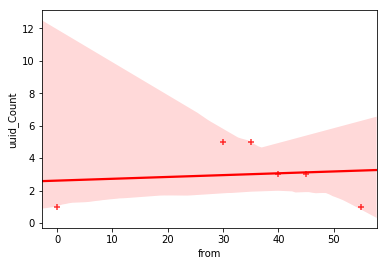

In [260]:
sns.regplot(x='from',y='uuid_Count',data=df12_grp,color='red',marker='+')

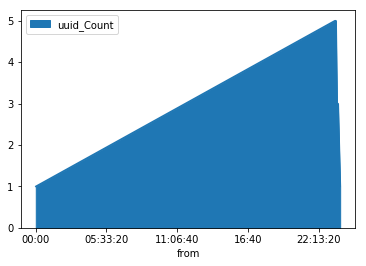

In [329]:
df12_grp[['from','uuid_Count']].set_index('from').plot(kind='area')

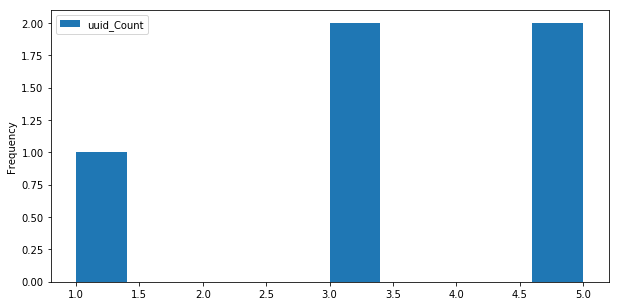

In [333]:
df12_grp.loc[df12_grp['start']=='2018-08-10'][['from','uuid_Count']].set_index('from').plot(kind='hist'
                                                                                            ,figsize=(10, 5))

In [335]:
temp = pd.to_datetime('2018-08-10',format='%Y\%m\%d')
# new_df['start'] = pd.to_datetime(new_df.start,format='%Y\%m\%d')
dfall12 = new_df.loc[(new_df['asset_id'] == 'SENSITY-kc-12')][['start','asset_id','bins1','bins','uuid',
                                                                                'latitude','longitude']]

In [337]:
dfall12['start'] = dfall12.bins1.dt.date

In [341]:
dfall12['start'] = pd.to_datetime(dfall12.start)

In [343]:
dfall12

,start,asset_id,bins1,bins,uuid,latitude,longitude
5,2018-08-10,SENSITY-kc-12,2018-08-10 23:30:00,2018-08-10 23:35:00,SENSITY-kc-12-4C26D1EC-4CCE-4E9A-87D1-D93149F5BEF6,39.095302,-94.583515
6,2018-08-10,SENSITY-kc-12,2018-08-10 23:35:00,2018-08-10 23:40:00,SENSITY-kc-12-4C26D1EC-4CCE-4E9A-87D1-D93149F5BEF6,39.095302,-94.583515
16,2018-08-10,SENSITY-kc-12,2018-08-10 23:45:00,2018-08-10 23:50:00,SENSITY-kc-12-012FEE39-6092-419F-B096-31FA7A3797AB,39.095549,-94.583495
29,2018-08-10,SENSITY-kc-12,2018-08-10 23:55:00,2018-08-11 00:00:00,SENSITY-kc-12-67CD92D1-1144-45D6-8938-12830A09AD6F,39.095554,-94.583488
30,2018-08-11,SENSITY-kc-12,2018-08-11 00:00:00,2018-08-11 00:05:00,SENSITY-kc-12-67CD92D1-1144-45D6-8938-12830A09AD6F,39.095554,-94.583488
32,2018-08-11,SENSITY-kc-12,2018-08-11 00:10:00,2018-08-11 00:15:00,SENSITY-kc-12-1A22267D-E0F1-4CBF-99B7-AE3AFA38BD49,39.095212,-94.583512
158,2018-08-10,SENSITY-kc-12,2018-08-10 23:30:00,2018-08-10 23:35:00,SENSITY-kc-12-E53F20FF-7B8E-4091-BAA5-B83DDCD650F3,39.095037,-94.583519
159,2018-08-10,SENSITY-kc-12,2018-08-10 23:35:00,2018-08-10 23:40:00,SENSITY-kc-12-E53F20FF-7B8E-4091-BAA5-B83DDCD650F3,39.095037,-94.583519
160,2018-08-10,SENSITY-kc-12,2018-08-10 23:40:00,2018-08-10 23:45:00,SENSITY-kc-12-E53F20FF-7B8E-4091-BAA5-B83DDCD650F3,39.095037,-94.583519
161,2018-08-10,SENSITY-kc-12,2018-08-10 23:45:00,2018-08-10 23:50:00,SENSITY-kc-12-E53F20FF-7B8E-4091-BAA5-B83DDCD650F3,39.095037,-94.583519


In [344]:
dfall12_grp = dfall12.groupby(['start','asset_id','bins1','bins']).count()[[
    'uuid']].add_suffix('_Count').reset_index()

In [363]:
dfall12_grp['from'] = dfall12_grp.bins1.dt.time
dfall12_grp

,start,asset_id,bins1,bins,uuid_Count,from
0,2018-08-10,SENSITY-kc-12,2018-08-10 23:30:00,2018-08-10 23:35:00,5,23:30:00
1,2018-08-10,SENSITY-kc-12,2018-08-10 23:35:00,2018-08-10 23:40:00,5,23:35:00
2,2018-08-10,SENSITY-kc-12,2018-08-10 23:40:00,2018-08-10 23:45:00,3,23:40:00
3,2018-08-10,SENSITY-kc-12,2018-08-10 23:45:00,2018-08-10 23:50:00,3,23:45:00
4,2018-08-10,SENSITY-kc-12,2018-08-10 23:55:00,2018-08-11 00:00:00,1,23:55:00
5,2018-08-11,SENSITY-kc-12,2018-08-11 00:00:00,2018-08-11 00:05:00,1,00:00:00
6,2018-08-11,SENSITY-kc-12,2018-08-11 00:10:00,2018-08-11 00:15:00,2,00:10:00
7,2018-08-11,SENSITY-kc-12,2018-08-11 00:15:00,2018-08-11 00:20:00,1,00:15:00
8,2018-08-11,SENSITY-kc-12,2018-08-11 00:20:00,2018-08-11 00:25:00,2,00:20:00
9,2018-08-11,SENSITY-kc-12,2018-08-11 00:25:00,2018-08-11 00:30:00,2,00:25:00


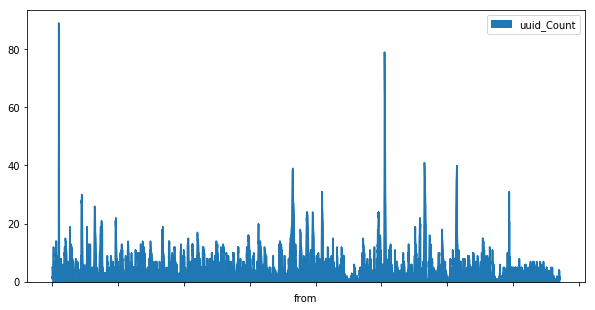

In [352]:
dfall12_grp[['from','uuid_Count']].set_index('from').plot(kind='area',figsize=(10, 5))

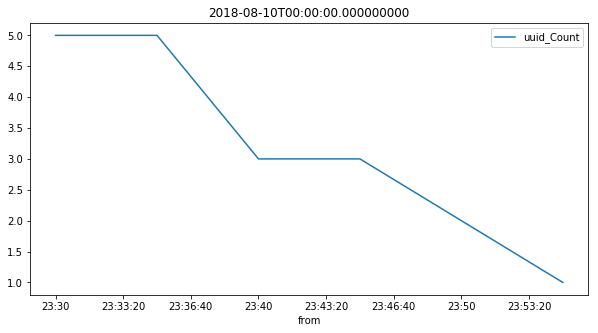

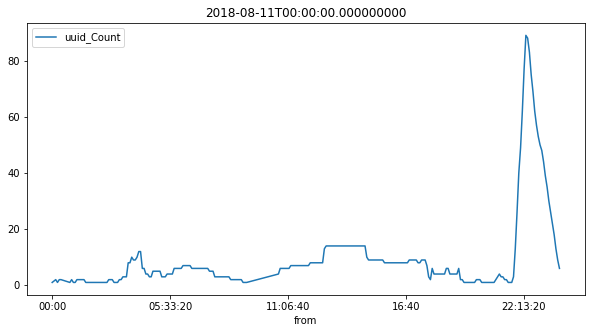

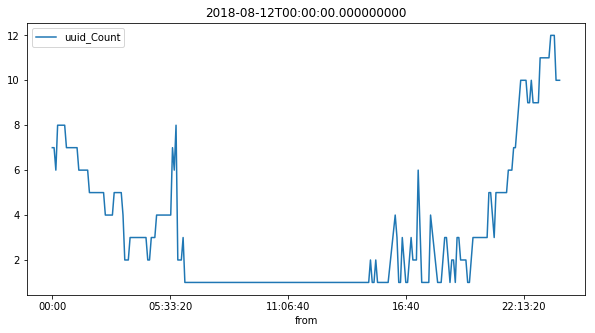

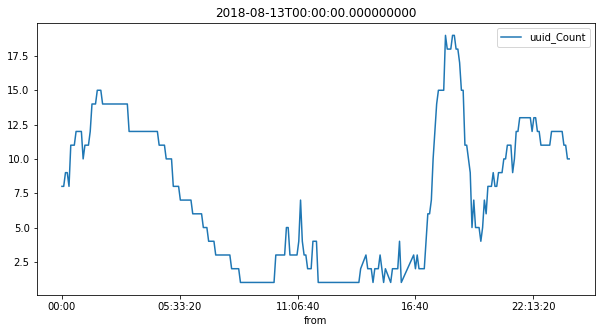

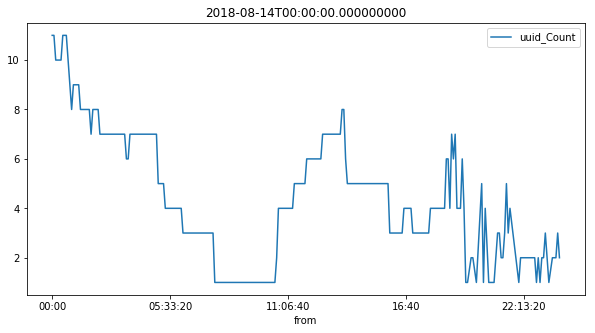

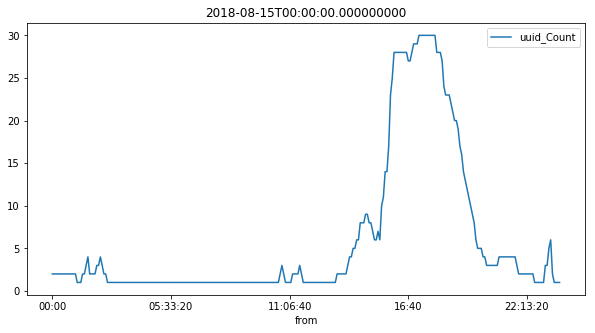

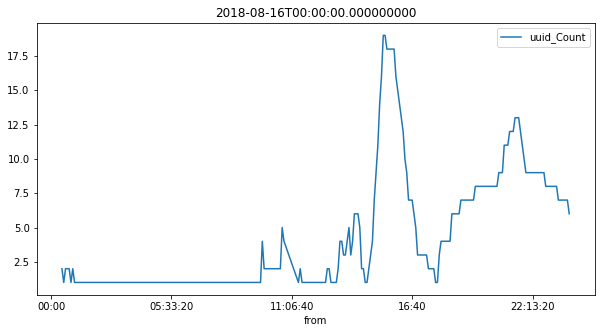

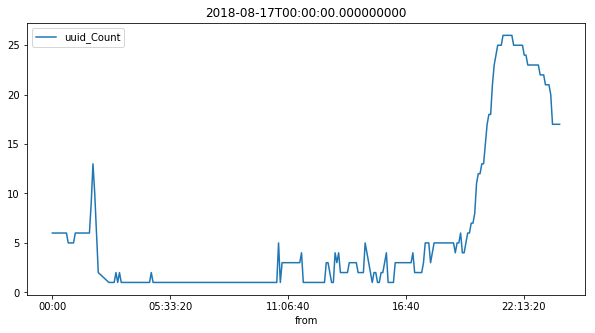

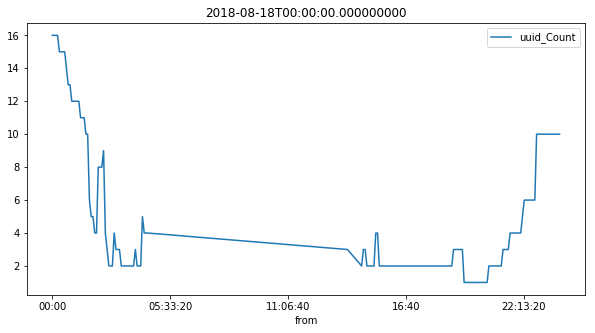

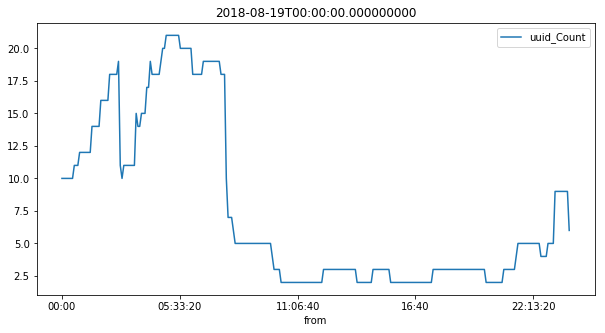

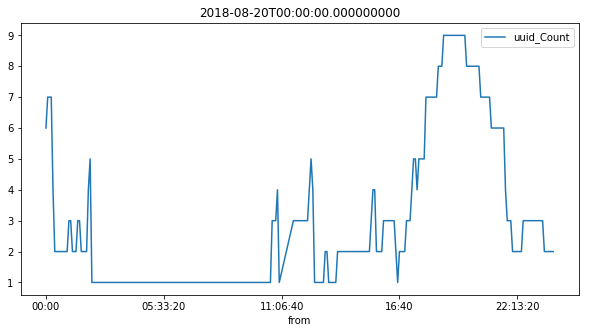

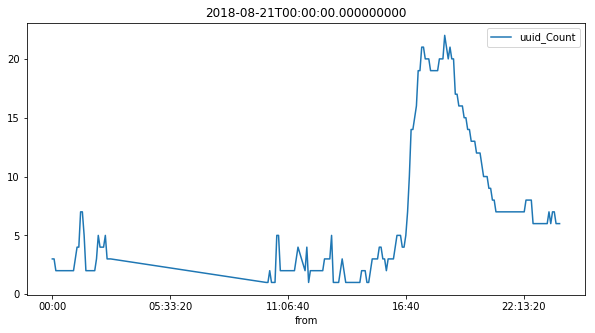

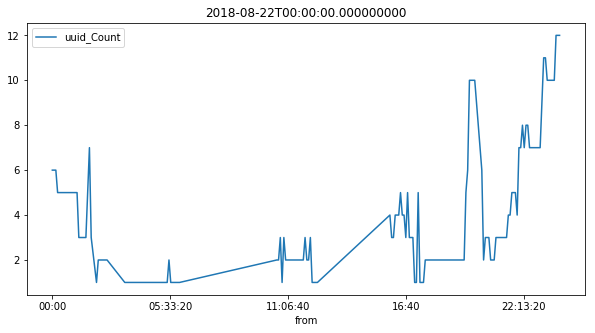

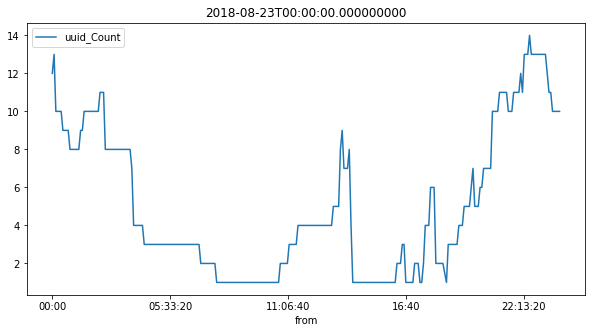

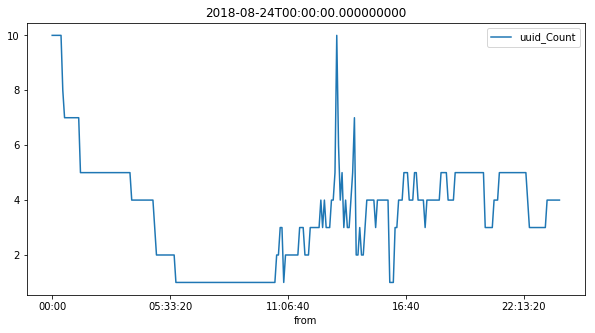

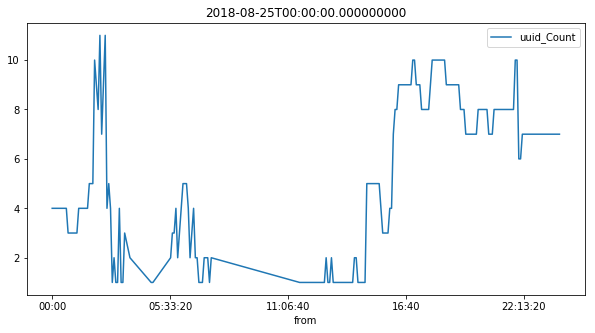

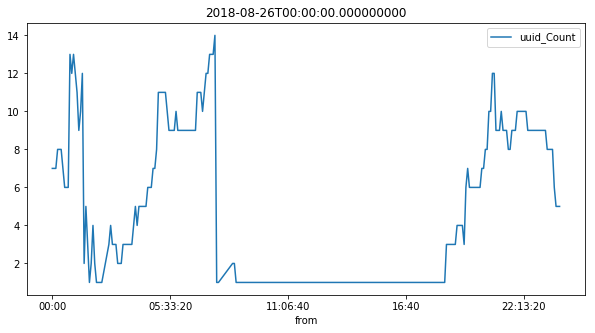

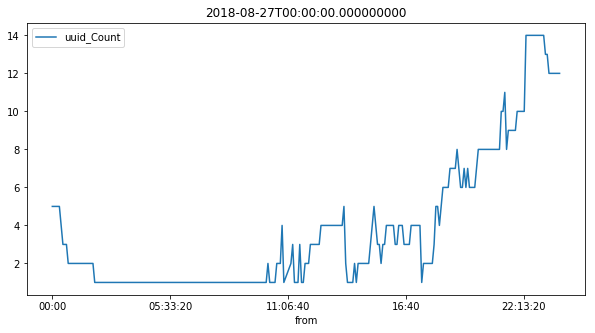

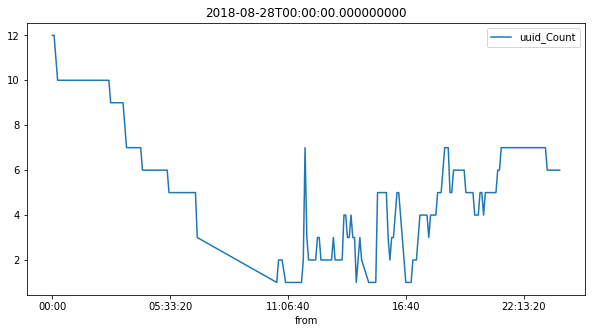

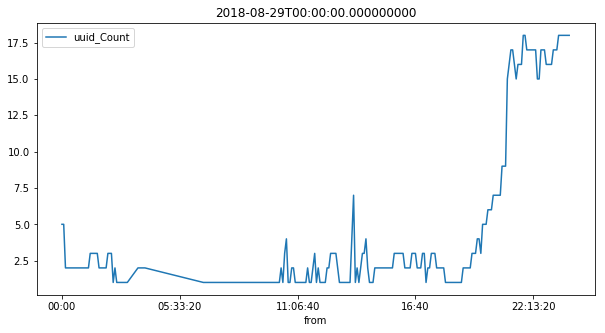

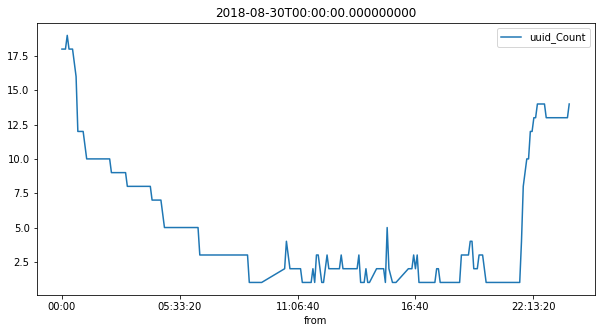

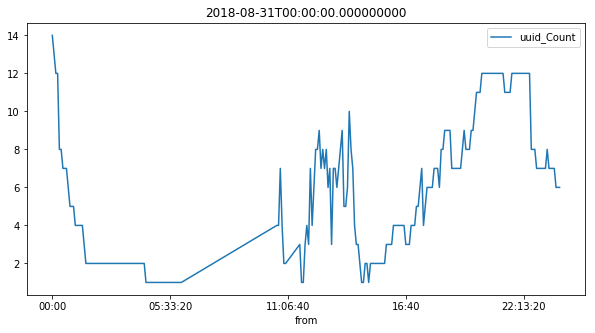

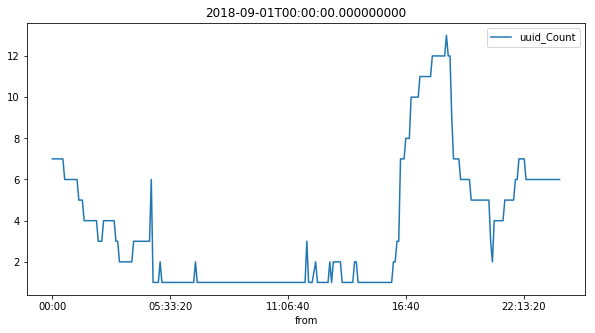

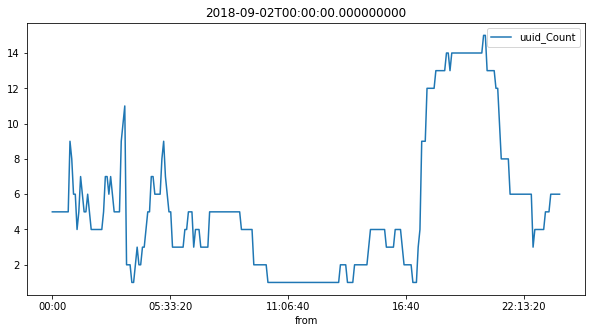

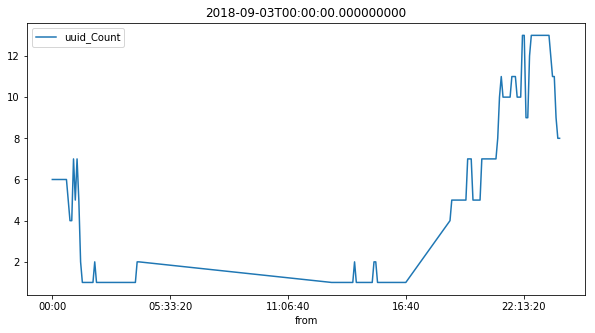

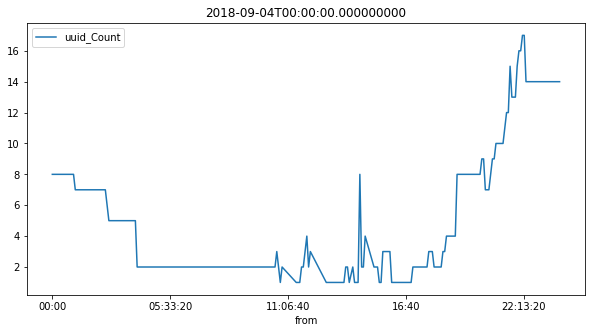

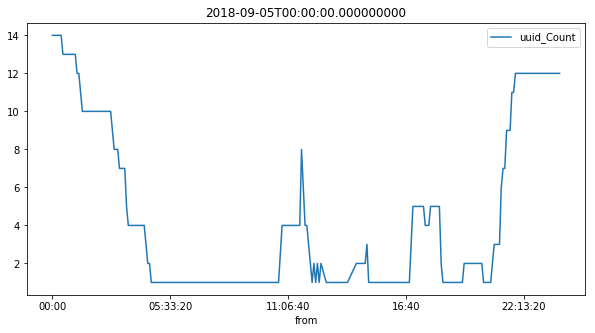

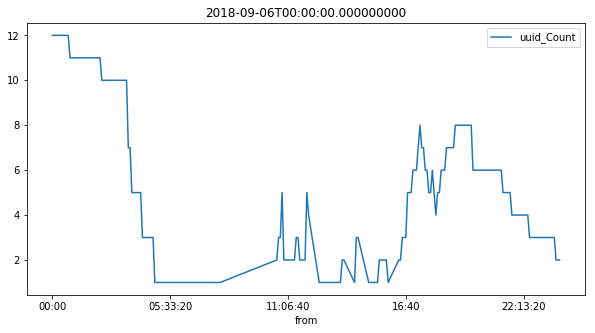

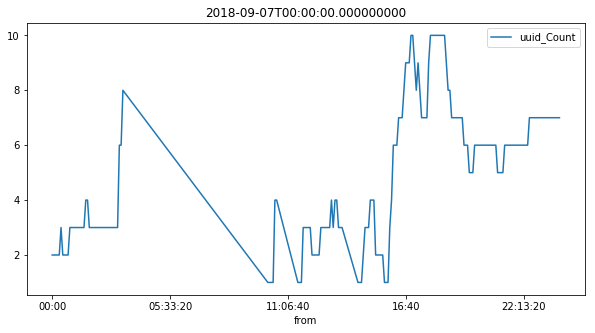

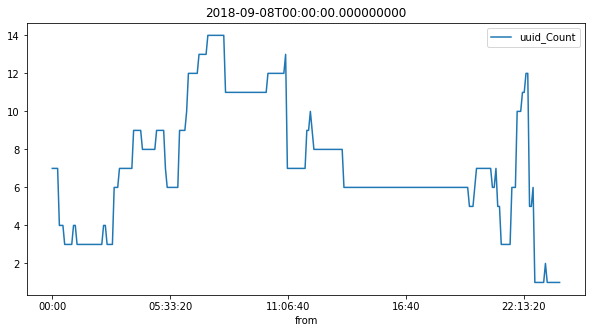

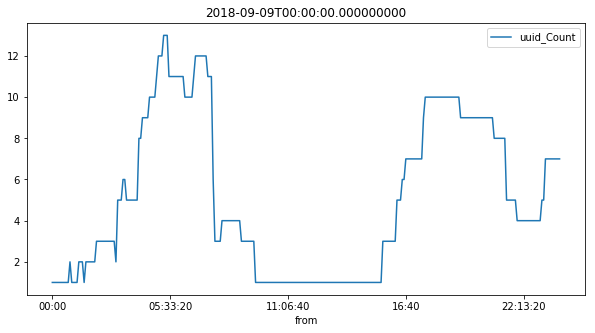

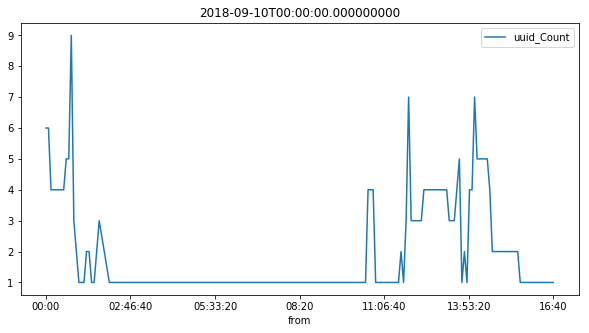

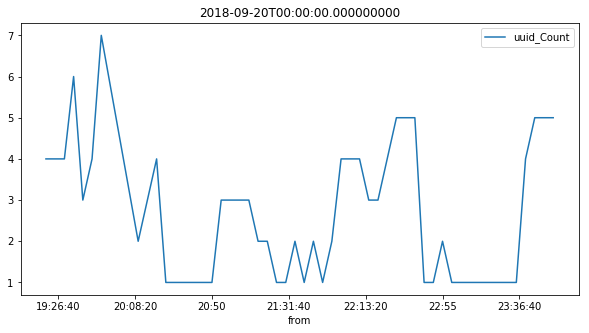

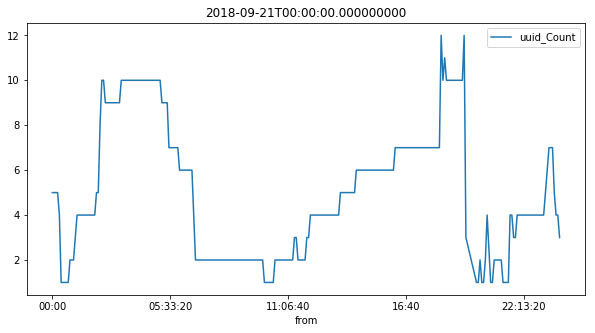

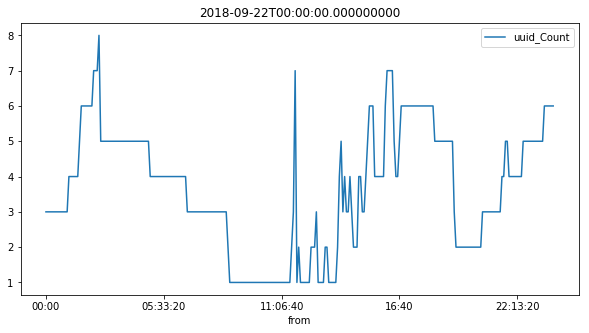

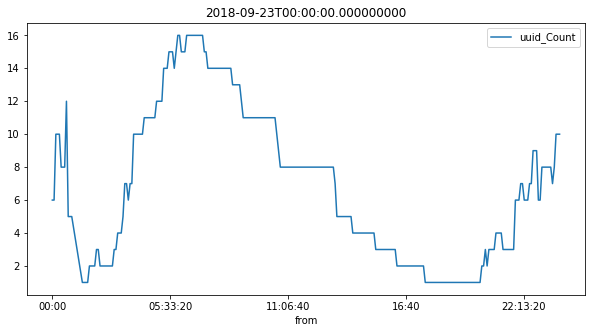

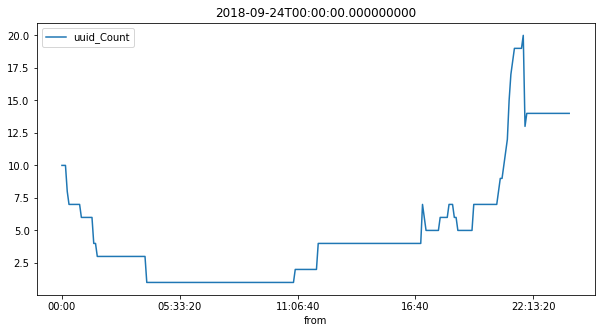

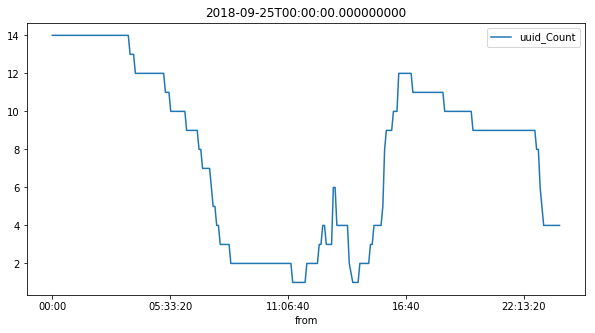

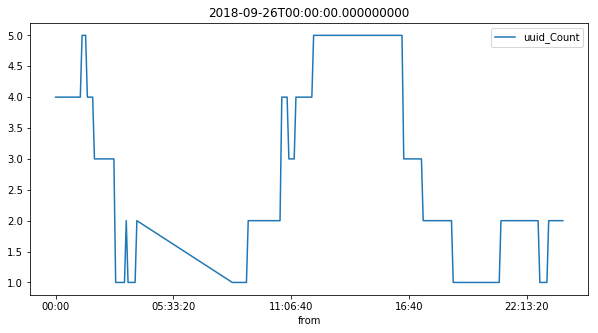

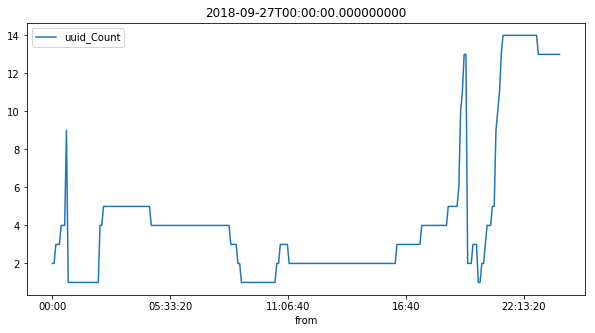

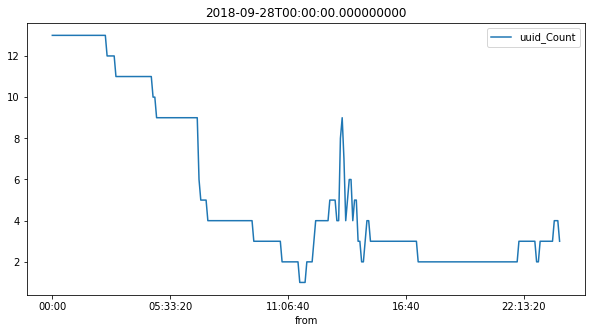

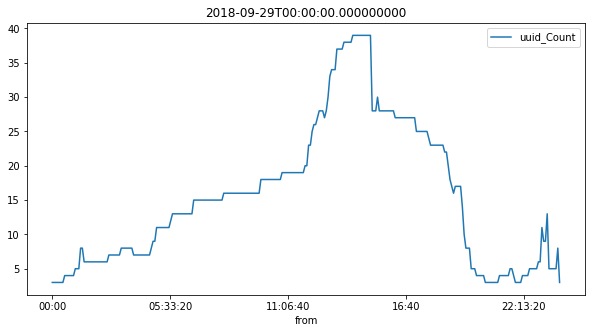

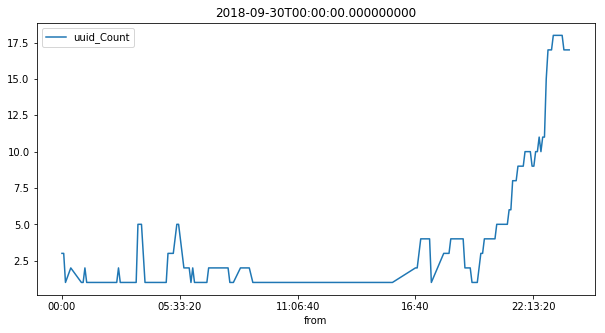

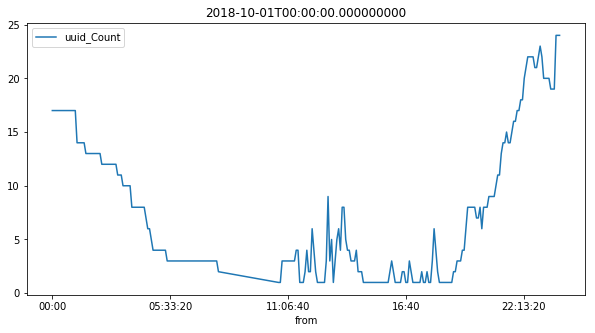

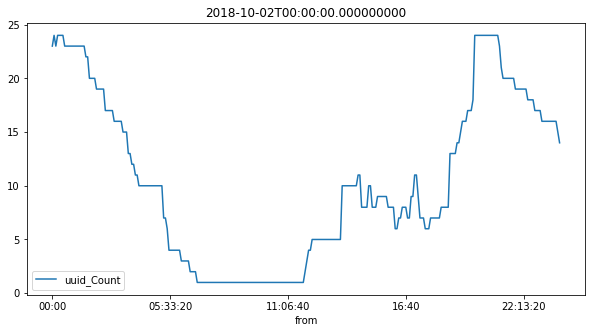

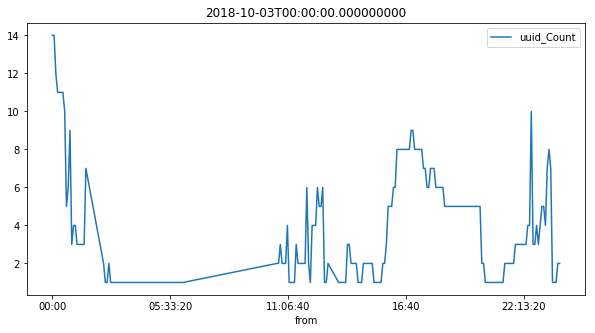

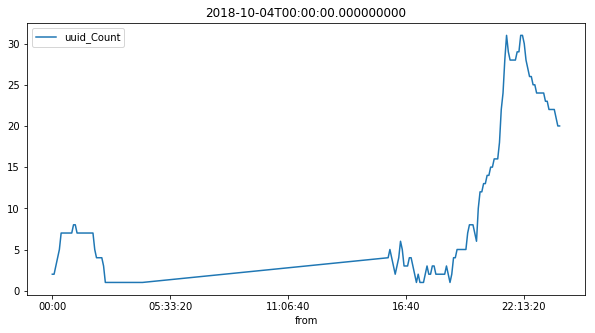

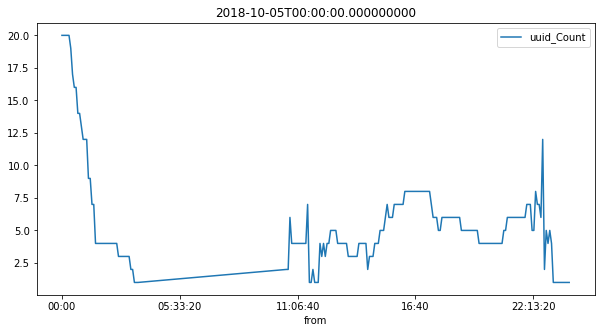

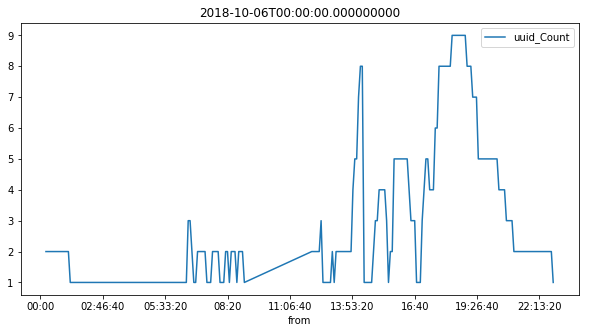

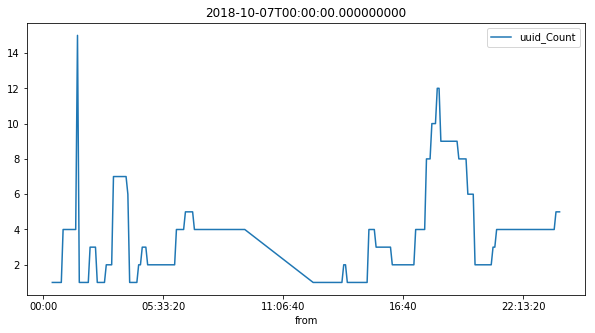

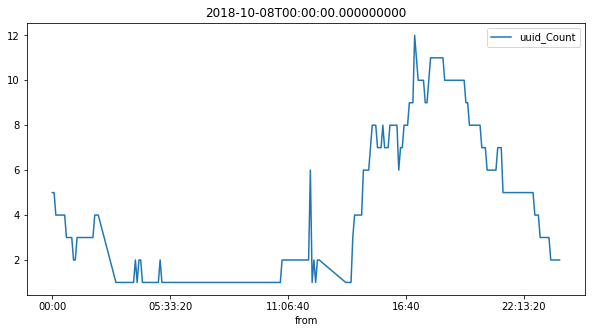

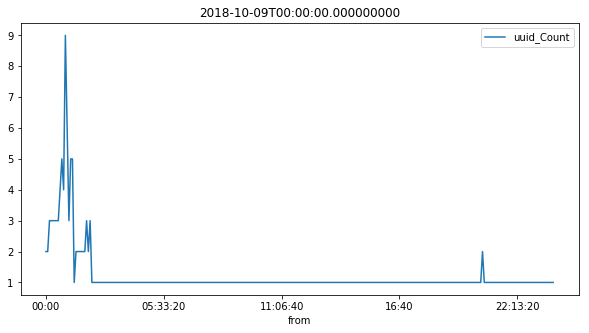

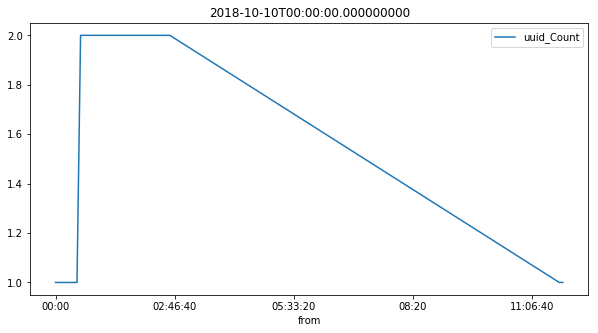

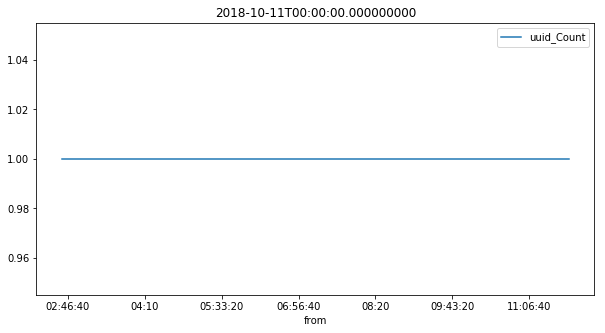

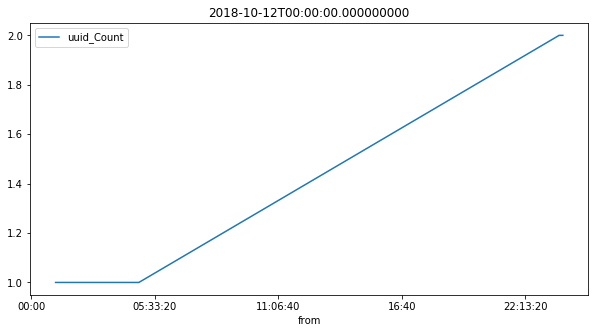

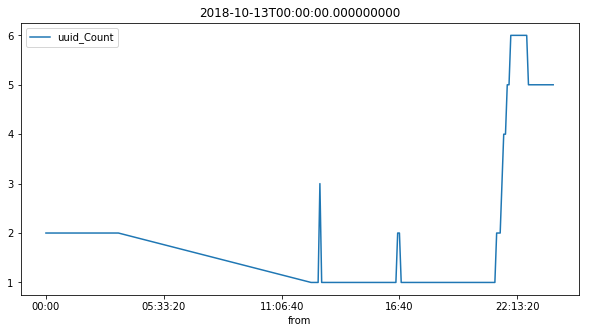

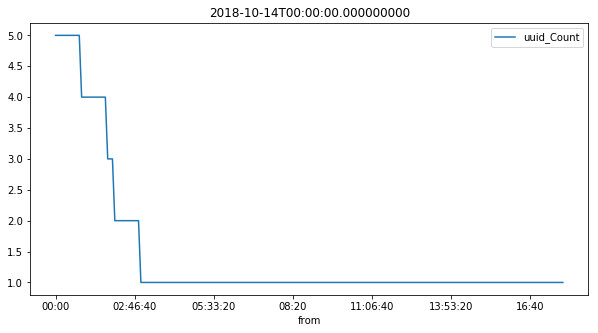

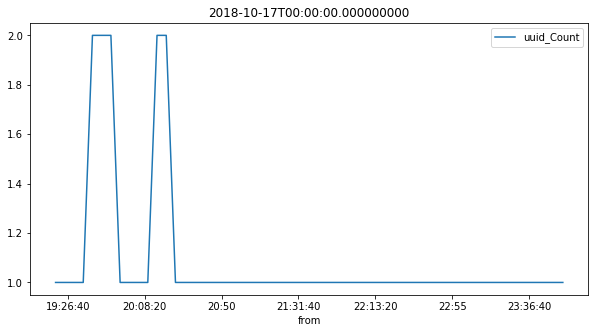

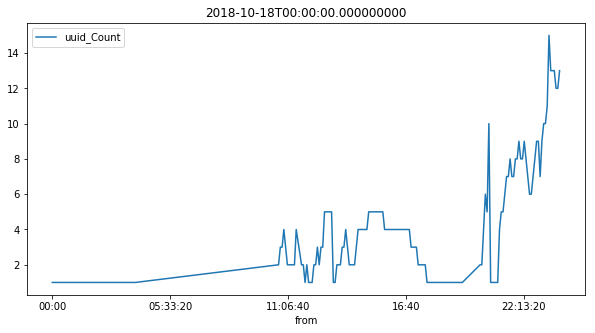

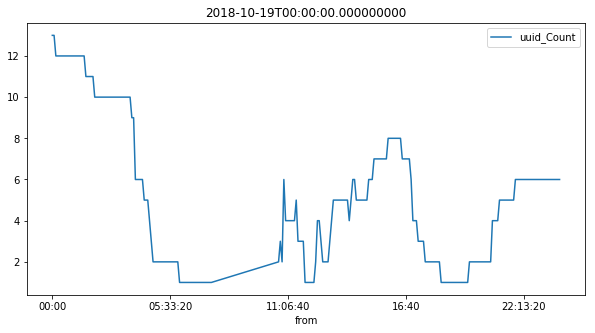

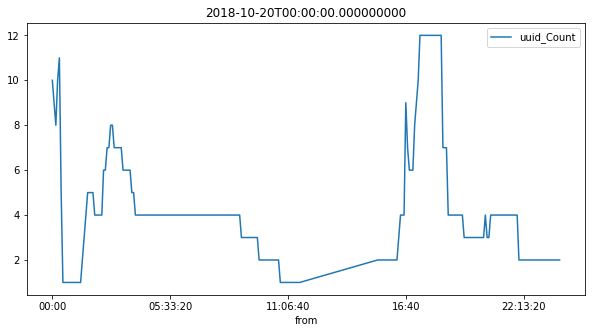

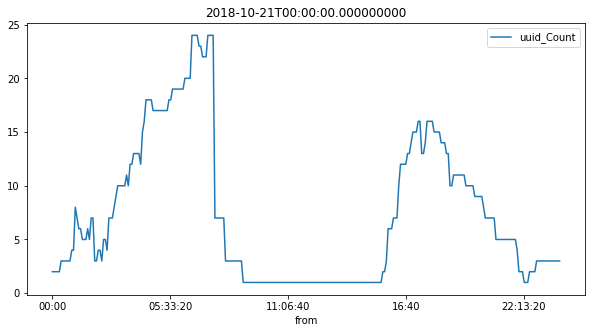

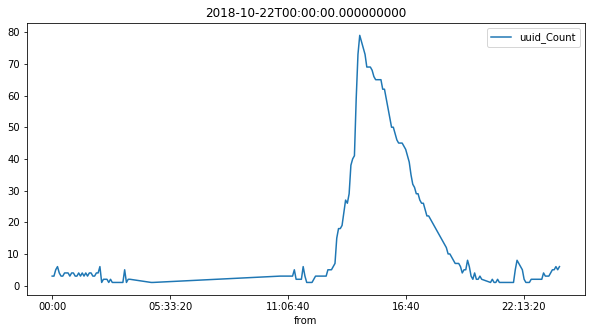

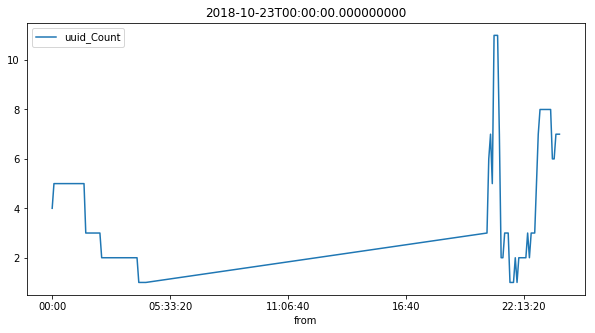

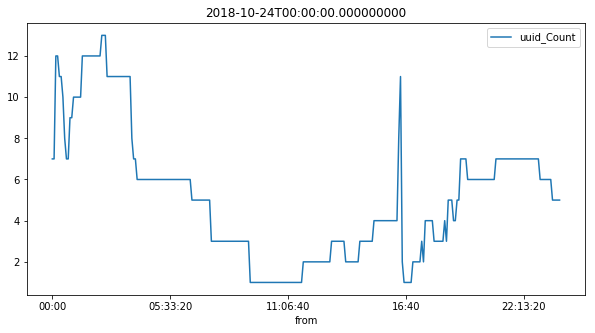

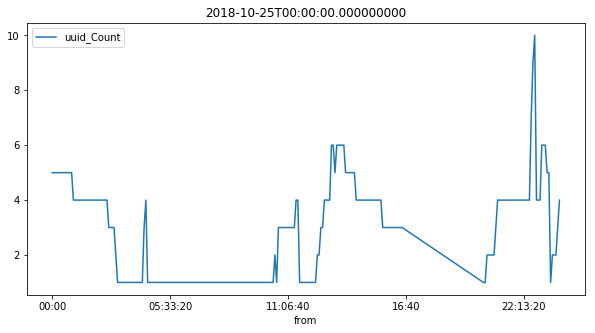

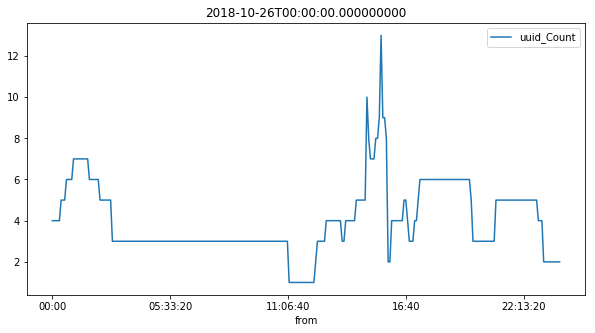

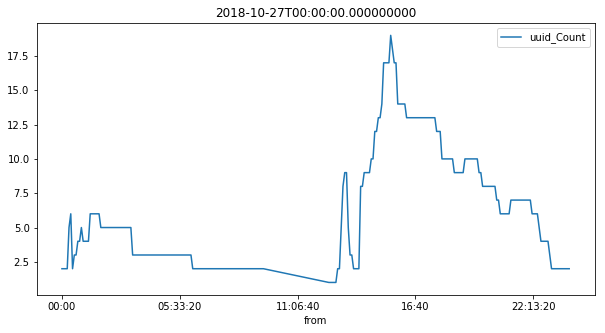

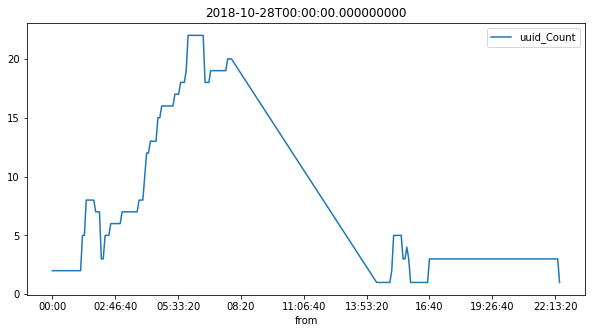

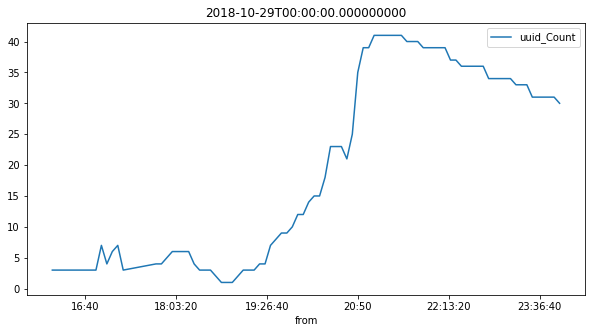

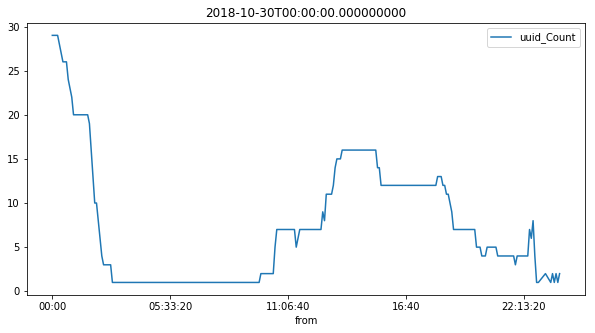

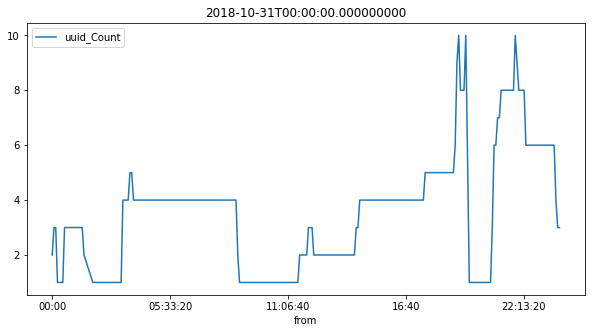

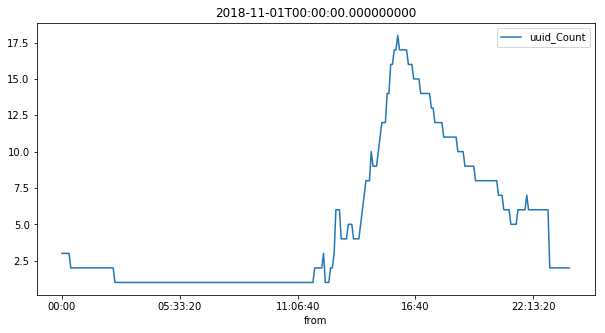

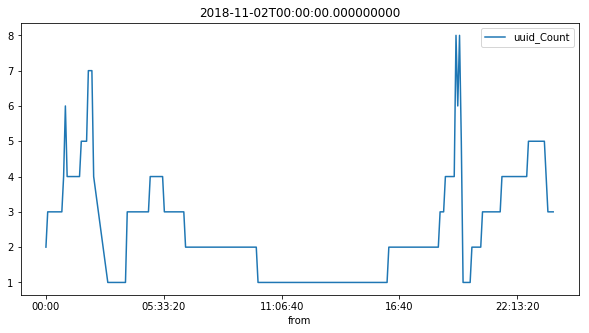

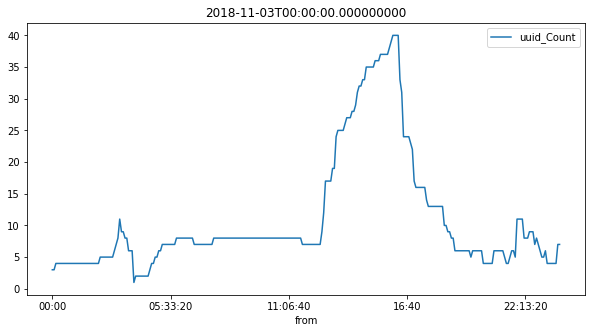

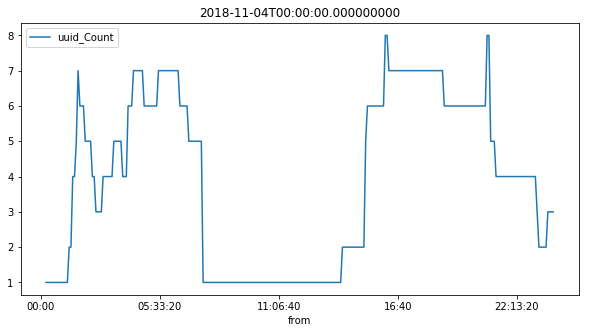

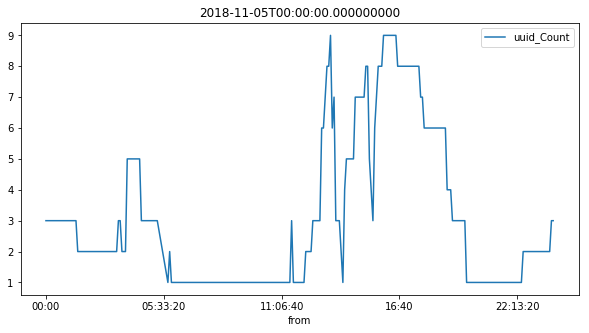

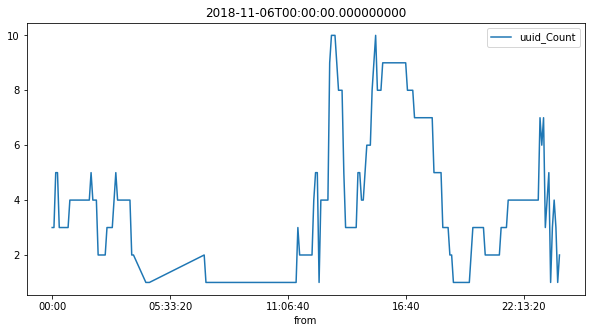

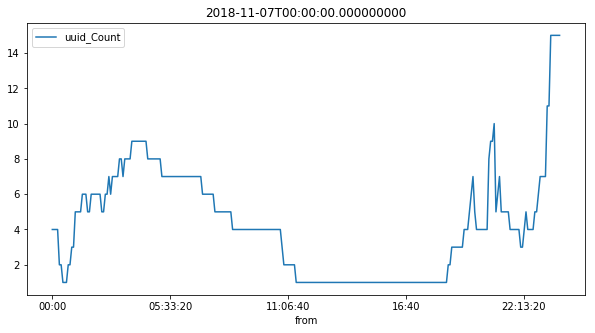

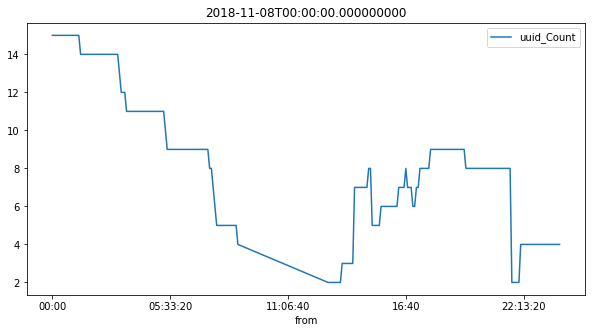

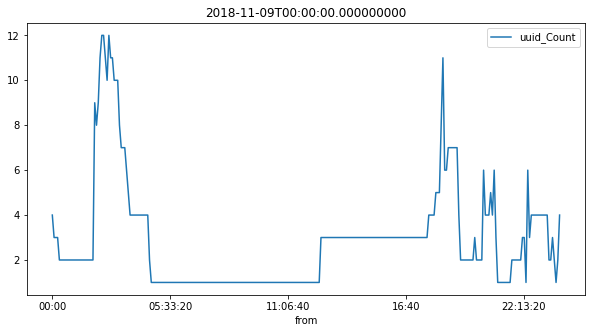

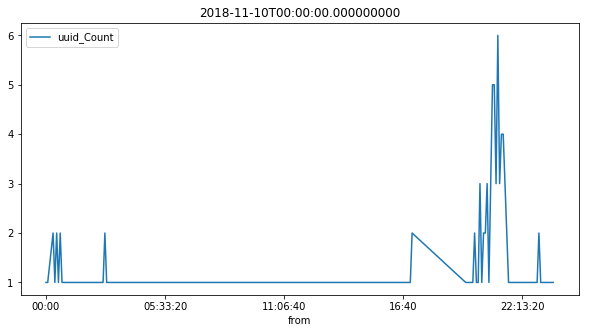

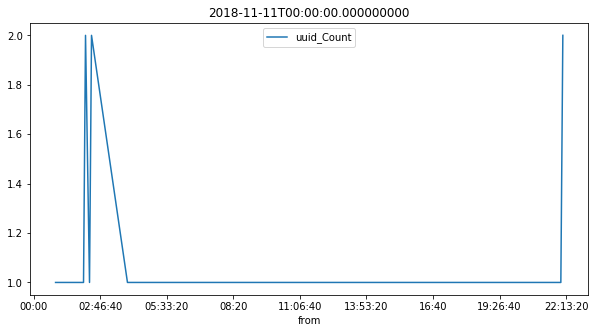

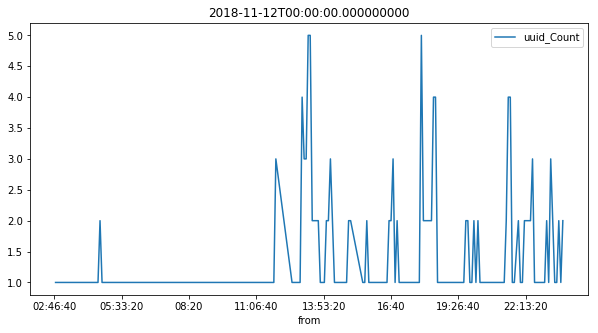

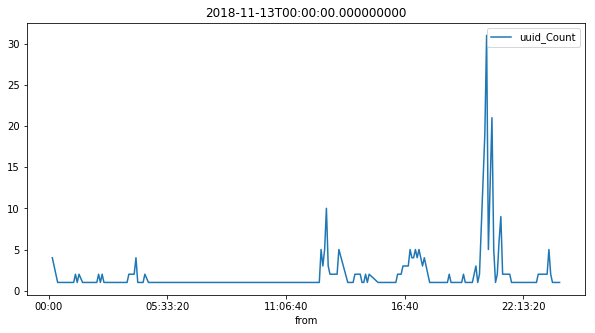

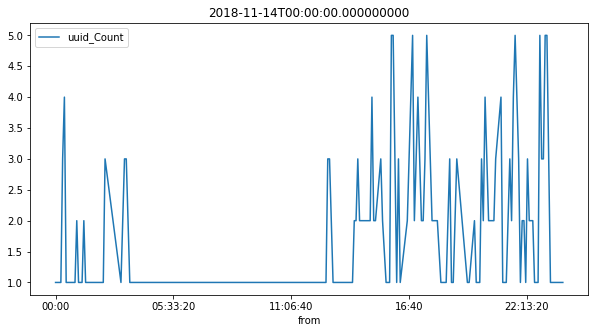

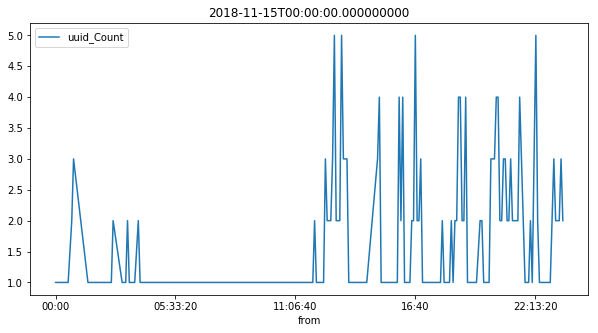

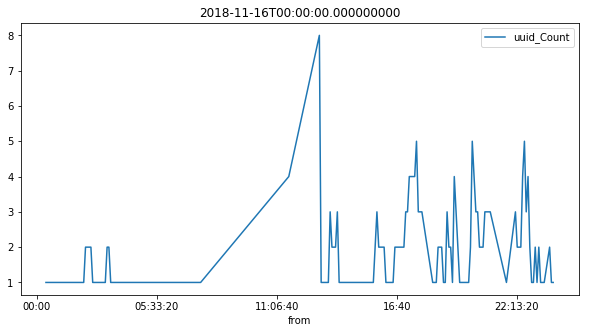

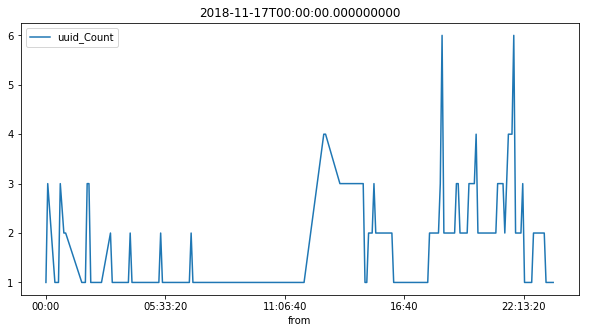

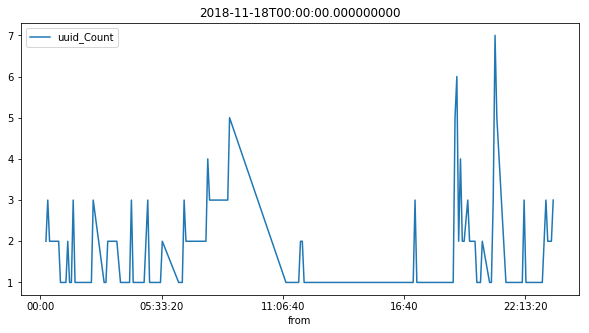

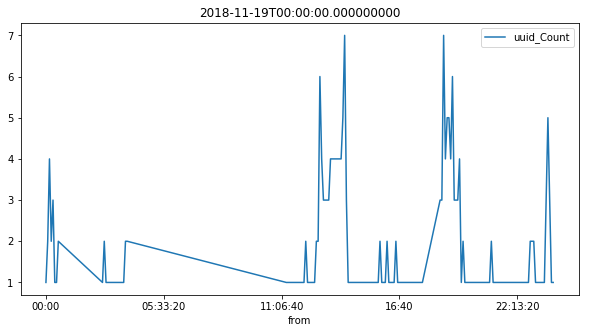

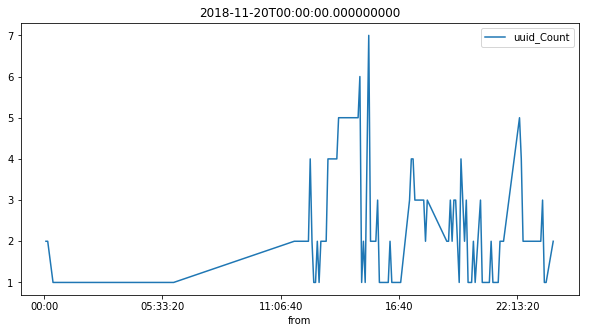

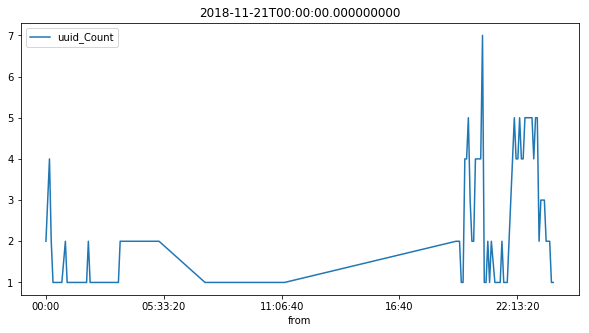

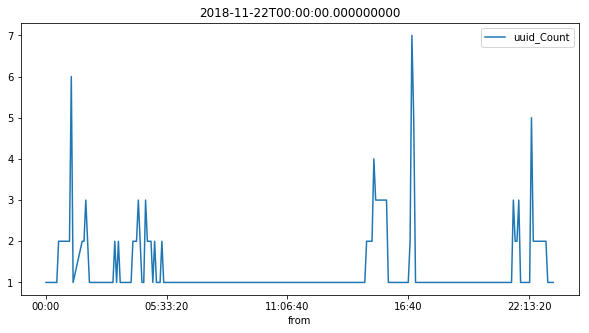

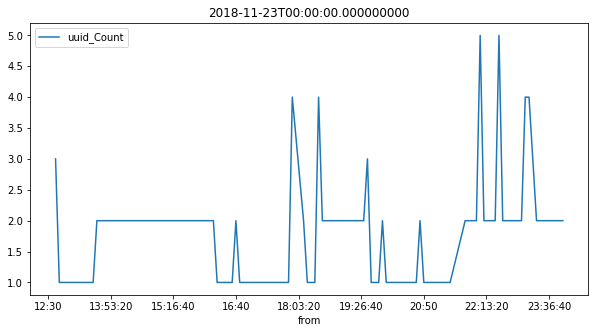

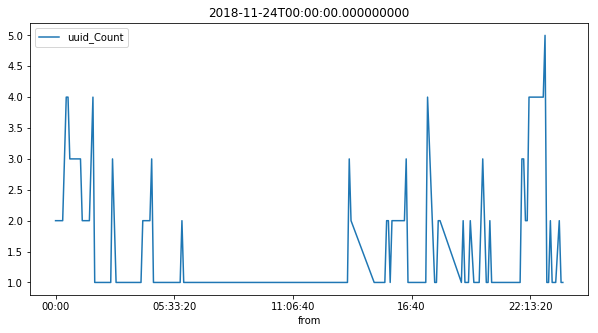

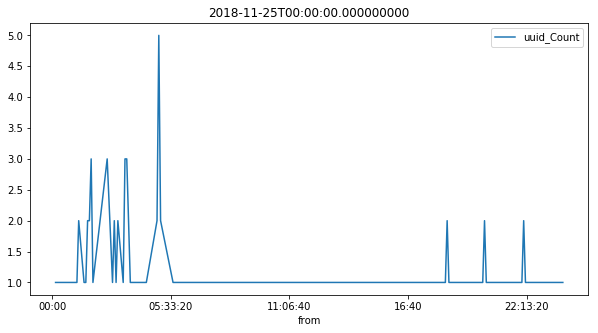

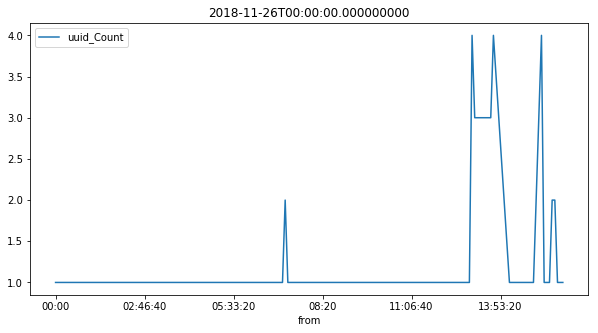

In [378]:
for x in dfall12_grp['start'].unique():
#     print(x)
    dfall12_grp.loc[dfall12_grp['start']==x][['from','uuid_Count']].set_index('from').plot(figsize=(10, 5))
    plt.title(x)
    plt.show()

In [367]:
new_df

,uuid,asset_id,start_date,end_date,latitude,longitude,start_from_fc,end_from_fc,diff,slots,bins,start,bins1
0,SENSITY-kc-23-40D98DC1-41F8-40EE-BBB8-E44DE41C79F2,SENSITY-kc-23,2018-08-10 23:33:26.081,2018-08-10 23:33:55.937100,39.109786,-94.583482,2018-08-10 23:30:00,2018-08-10 23:35:00,5.0,1,2018-08-10 23:35:00,2018-08-10,2018-08-10 23:30:00
1,SENSITY-kc-22-E5EBBB3A-05E4-4D9C-97CB-2654291867B6,SENSITY-kc-22,2018-08-10 23:34:58.454,2018-08-10 23:36:08.256733,39.109536,-94.580771,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0,2,2018-08-10 23:35:00,2018-08-10,2018-08-10 23:30:00
2,SENSITY-kc-22-E5EBBB3A-05E4-4D9C-97CB-2654291867B6,SENSITY-kc-22,2018-08-10 23:34:58.454,2018-08-10 23:36:08.256733,39.109536,-94.580771,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0,2,2018-08-10 23:40:00,2018-08-10,2018-08-10 23:35:00
3,SENSITY-kc-10-C4D472BA-65CA-4D2B-A6C0-9C3981CDEBFC,SENSITY-kc-10,2018-08-10 23:33:40.424,2018-08-10 23:36:25.890125,39.094360,-94.583396,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0,2,2018-08-10 23:35:00,2018-08-10,2018-08-10 23:30:00
4,SENSITY-kc-10-C4D472BA-65CA-4D2B-A6C0-9C3981CDEBFC,SENSITY-kc-10,2018-08-10 23:33:40.424,2018-08-10 23:36:25.890125,39.094360,-94.583396,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0,2,2018-08-10 23:40:00,2018-08-10,2018-08-10 23:35:00
5,SENSITY-kc-12-4C26D1EC-4CCE-4E9A-87D1-D93149F5BEF6,SENSITY-kc-12,2018-08-10 23:34:44.149,2018-08-10 23:38:53.829785,39.095302,-94.583515,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0,2,2018-08-10 23:35:00,2018-08-10,2018-08-10 23:30:00
6,SENSITY-kc-12-4C26D1EC-4CCE-4E9A-87D1-D93149F5BEF6,SENSITY-kc-12,2018-08-10 23:34:44.149,2018-08-10 23:38:53.829785,39.095302,-94.583515,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0,2,2018-08-10 23:40:00,2018-08-10,2018-08-10 23:35:00
7,SENSITY-kc-9-CDDB22AD-31F6-4A11-BC94-CCC6602575A1,SENSITY-kc-9,2018-08-10 23:37:38.946,2018-08-10 23:39:01.415632,39.092984,-94.583621,2018-08-10 23:35:00,2018-08-10 23:40:00,5.0,1,2018-08-10 23:40:00,2018-08-10,2018-08-10 23:35:00
8,SENSITY-kc-14-EC9EB215-CFAC-437F-9FEE-CF8917FFE97E,SENSITY-kc-14,2018-08-10 23:34:12.119,2018-08-10 23:39:38.118686,39.097486,-94.583381,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0,2,2018-08-10 23:35:00,2018-08-10,2018-08-10 23:30:00
9,SENSITY-kc-14-EC9EB215-CFAC-437F-9FEE-CF8917FFE97E,SENSITY-kc-14,2018-08-10 23:34:12.119,2018-08-10 23:39:38.118686,39.097486,-94.583381,2018-08-10 23:30:00,2018-08-10 23:40:00,10.0,2,2018-08-10 23:40:00,2018-08-10,2018-08-10 23:35:00


Text(0,0.5,'Count of Carks Parked')

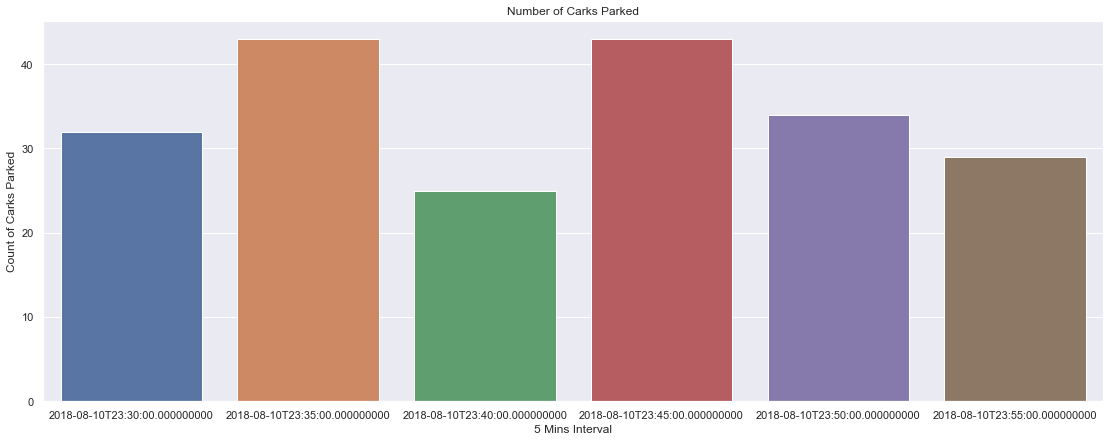

In [530]:
sns.set()
sns.barplot(df_temp_5min.loc[new_df['start']=='2018-08-10']['bins1'].value_counts().index,
            df_temp_5min.loc[new_df['start']==
                            '2018-08-10']['bins1'].value_counts().get_values(), data=df_temp_5min)
plt.title("Number of Carks Parked")
plt.xlabel("5 Mins Interval")
plt.ylabel("Count of Carks Parked")

In [399]:
new_main_df = new_df.copy()
new_main_df['start'] = pd.to_datetime(new_df.bins1.dt.date)

,start,asset_id,bins1,bins,uuid,latitude,longitude


In [402]:
df_temp_5min = new_df.loc[(new_main_df['start']  == '2018-08-10')][['start','asset_id','bins1','bins','uuid',
                                                                                'latitude','longitude']]

In [407]:
df_temp_5min_grp = df_temp_5min.groupby([
    'bins1','bins','asset_id']).count()[['uuid']].add_suffix('_Count').reset_index()

In [420]:
df_temp_5min_grp.loc[df_temp_5min_grp['bins1']=='2018-08-10 23:30:00']

,bins1,bins,asset_id,uuid_Count
0,2018-08-10 23:30:00,2018-08-10 23:35:00,SENSITY-kc-10,3
1,2018-08-10 23:30:00,2018-08-10 23:35:00,SENSITY-kc-12,5
2,2018-08-10 23:30:00,2018-08-10 23:35:00,SENSITY-kc-14,4
3,2018-08-10 23:30:00,2018-08-10 23:35:00,SENSITY-kc-18,4
4,2018-08-10 23:30:00,2018-08-10 23:35:00,SENSITY-kc-2,3
5,2018-08-10 23:30:00,2018-08-10 23:35:00,SENSITY-kc-22,2
6,2018-08-10 23:30:00,2018-08-10 23:35:00,SENSITY-kc-23,8
7,2018-08-10 23:30:00,2018-08-10 23:35:00,SENSITY-kc-8,3


No handles with labels found to put in legend.


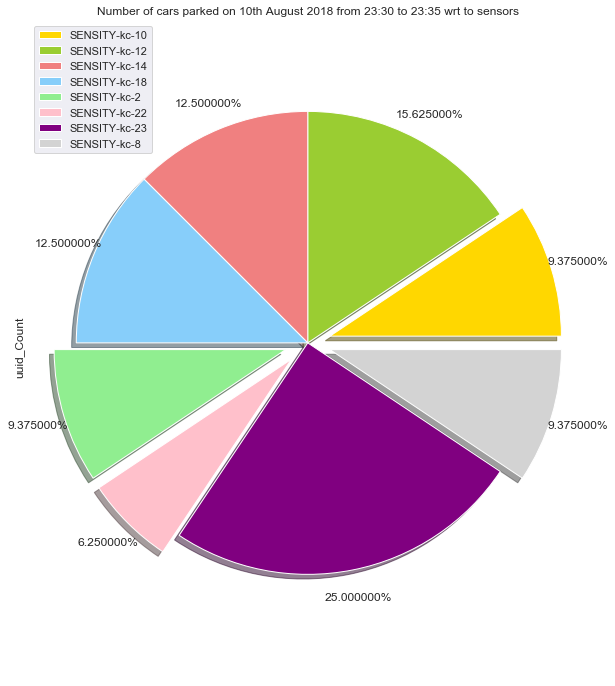

In [509]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink','purple','lightgrey']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1,0,0.1] # ratio for each continent with which to offset each wedge.

df_temp_5min_grp.loc[df_temp_5min_grp['bins1']=='2018-08-10 23:30:00'].set_index(
    'asset_id')[['uuid_Count']].plot(kind='pie',
                            figsize=(10, 12),
                            autopct='%f%%', # add in percentages
                            startangle=0,     # start angle 90° (Africa)
                            shadow=True,  
                            subplots=True,# add shadow
                                     labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )
plt.title('Number of cars parked on 10th August 2018 from 23:30 to 23:35 wrt to sensors', y=1.0) 

plt.axis('equal') 

plt.legend(labels=df_temp_5min_grp['asset_id'], loc='upper left') 
plt.show()

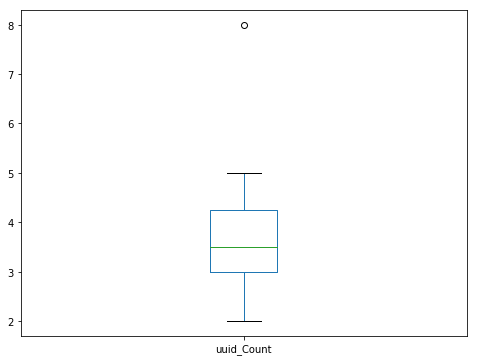

In [422]:
df_temp_5min_grp.loc[df_temp_5min_grp['bins1']=='2018-08-10 23:30:00'].set_index(
    'asset_id')[['uuid_Count']].plot(kind='box', figsize=(8, 6))

In [533]:
!pip install folium

    100% |████████████████████████████████| 92kB 1.0MB/s ta 0:00:011
twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 19.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [535]:
import folium
world_map = folium.Map()

# display world map
world_map

In [540]:
world_map = folium.Map(location=[39.109, -94.583], zoom_start=12)

# display world map
world_map

In [1]:
map = folium.Map(location=[39.089637429261, -94.5836246456117], zoom_start=35)
incidents = folium.map.FeatureGroup()
incidents.add_child(
    folium.Marker(
        [39.0895257143255, -94.5836298337034]
    )
)
incidents.add_child(
    folium.Marker(
        [39.089637429261, -94.5836246456117]
    )
)
incidents.add_child(
    folium.Marker(
        [39.089588866339, -94.5836252896754]
    )
)
map.add_child(incidents)

NameError: name 'folium' is not defined

In [549]:
data = pd.DataFrame({
'lat':[-94.583],
'lon':[39.103],
'name':['Buenos Aires']
})
data
 
# Make an empty map
m = folium.Map(location=[20, 0], tiles="Mapbox Bright", zoom_start=7)
 
# I can add marker one by one on the map
for i in range(0,len(data)):
    folium.Marker([data.iloc[i]['lon'], data.iloc[i]['lat']], popup=data.iloc[i]['name']).add_to(m)
 
# Save it as html
# m.save('312_markers_on_folium_map1.html')
